# Assignment 1 Text Analysis


## Setting up the project

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string



In [2]:
nltk.download('punkt_tab')


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


### Accessing the data

In [4]:

file_path = "Australian Skills Classification - December 2023.xlsx"
sheets = ["Occupation descriptions", "Core competency descriptions", "Specialist tasks hierarchy", "Tech tools heirarchy", "Core competencies", "Specialist tasks data", "Technology tools", "Appendix - tech tool examples"]

occupation_df = pd.read_excel(file_path, sheet_name=sheets[0], engine = "openpyxl")
cc_desc_df = pd.read_excel(file_path, sheet_name=sheets[1], engine = "openpyxl")
cc_df = pd.read_excel(file_path, sheet_name=sheets[4], engine = "openpyxl")
st_hier_df = pd.read_excel(file_path, sheet_name=sheets[2], engine = "openpyxl")
st_df = pd.read_excel(file_path, sheet_name=sheets[5], engine = "openpyxl")
tt_hier_df = pd.read_excel(file_path, sheet_name=sheets[3], engine = "openpyxl")
tt_df = pd.read_excel(file_path, sheet_name=sheets[6], engine = "openpyxl")
tt_eg = pd.read_excel(file_path, sheet_name=sheets[7], engine = "openpyxl")


In [5]:
df_list = [
    ("occupation_df", occupation_df),
    ("cc_desc_df", cc_desc_df),
    ("cc_df", cc_df),
    ("st_hier_df", st_hier_df),
    ("st_df", st_df),
    ("tt_hier_df", tt_hier_df),
    ("tt_df", tt_df),
]

for name, df in df_list:
    print(f"{name} columns: )", df.info())
    print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Occupation Type     1650 non-null   object
 1   ANZSCO Code         1650 non-null   int64 
 2   Sub-Profile Code    472 non-null    object
 3   ANZSCO Title        1650 non-null   object
 4   ANZSCO Description  1650 non-null   object
dtypes: int64(1), object(4)
memory usage: 64.6+ KB
occupation_df columns: ) None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Core Competency              100 non-null    object
 1   Core Competency Description  100 non-null    object
 2   Score                        100 non-null    int64 
 3   Proficiency Level            100 non-null    object
 4   Anchor Value              

### Basic Data Pre-processing for NLP project

## Initial Exploratory Data Analysis

### EDA - Occupation List Dataframe

In [6]:
occupation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Occupation Type     1650 non-null   object
 1   ANZSCO Code         1650 non-null   int64 
 2   Sub-Profile Code    472 non-null    object
 3   ANZSCO Title        1650 non-null   object
 4   ANZSCO Description  1650 non-null   object
dtypes: int64(1), object(4)
memory usage: 64.6+ KB


In [7]:
print("There are",occupation_df['Occupation Type'].nunique(), "types of Occupations listed in ACS")
print('These occupations are:', occupation_df['Occupation Type'].unique())

There are 5 types of Occupations listed in ACS
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'Specialisation' 'NEC Category Occupation'
 'NEC Category']


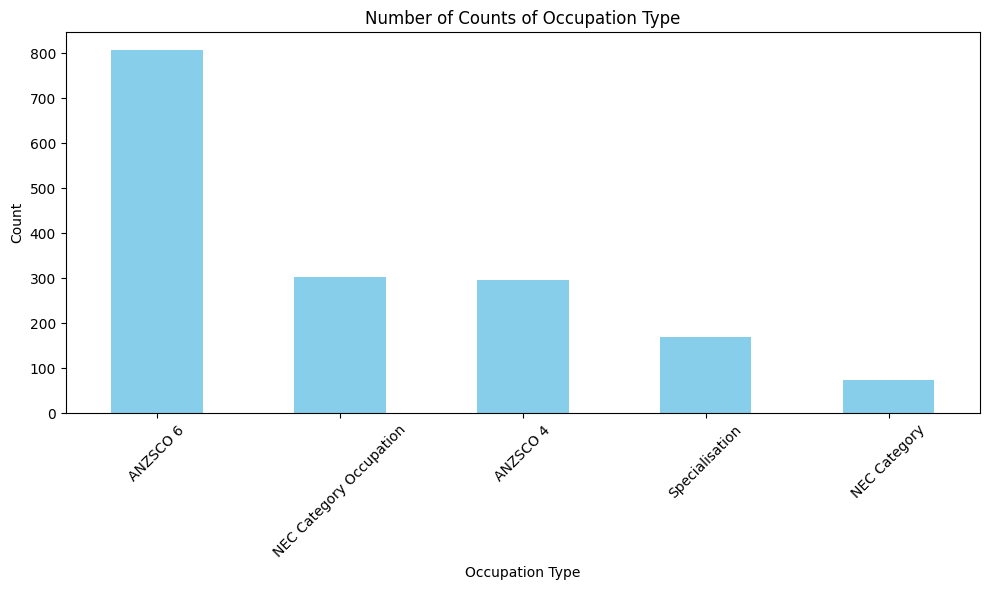

In [8]:
import matplotlib.pyplot as plt

# Count occurrences of each occupation type
occupation_counts = occupation_df['Occupation Type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Occupation Type")
plt.ylabel("Count")
plt.title("Number of Counts of Occupation Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
print("There are",occupation_df['ANZSCO Code'].count(), "different occupations listed")

There are 1650 different occupations listed


In [10]:
# Count occurrences of each ANZSCO Title
duplicate_counts = occupation_df['ANZSCO Title'].value_counts()

# Filter only titles that appear more than once
duplicates = duplicate_counts[duplicate_counts > 1]

# Check if there are any duplicates and print results
if not duplicates.empty:
    print("Duplicated ANZSCO Titles and their counts:\n", duplicates)
else:
    print("There is no job duplication in the dataset.")


There is no job duplication in the dataset.


In [11]:
# Get unique occupation types where 'Sub-Profile Code' is not NaN
occupation_types_with_subprofile = occupation_df.loc[occupation_df['Sub-Profile Code'].notna(), 'Occupation Type'].unique()

# Display the results
print("Occupation Types with Sub-Profile Code:\n", occupation_types_with_subprofile)


Occupation Types with Sub-Profile Code:
 ['Specialisation' 'NEC Category Occupation']


In [12]:
# Count occurrences of each ANZSCO Title
duplicate_counts = occupation_df['ANZSCO Description'].value_counts()

# Filter only titles that appear more than once
duplicates = duplicate_counts[duplicate_counts > 1]

# Check if there are any duplicates and print results
if not duplicates.empty:
    print("Duplicated ANZSCO Description and their counts:\n", duplicates)
else:
    print("There is no job description duplication in the dataset.")


# show example that even though there is no duplication but how even a small change (emu example) can cause this

There is no job description duplication in the dataset.


### EDA - Core Competency Dataframes
1. Core Competency Description
2. Core Competency Data

In [13]:
cc_desc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Core Competency              100 non-null    object
 1   Core Competency Description  100 non-null    object
 2   Score                        100 non-null    int64 
 3   Proficiency Level            100 non-null    object
 4   Anchor Value                 100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [14]:
print(cc_desc_df['Core Competency'].nunique())
print(cc_desc_df['Core Competency'].unique())

10
['Digital engagement' 'Initiative and innovation' 'Learning' 'Numeracy'
 'Oral communication' 'Planning and organising' 'Problem solving'
 'Reading' 'Teamwork' 'Writing']


In [15]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Occupation Type    11030 non-null  object 
 1   ANZSCO Code        11030 non-null  int64  
 2   Sub-Profile Code   0 non-null      float64
 3   ANZSCO Title       11030 non-null  object 
 4   Core Competency    11030 non-null  object 
 5   Score              11030 non-null  int64  
 6   Proficiency Level  11030 non-null  object 
 7   Anchor Value       11030 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 689.5+ KB


In [16]:
print("There are",cc_df['Occupation Type'].nunique(), "types of Occupations listed in Core Competency Data")
print('These occupations are:', cc_df['Occupation Type'].unique())
print("There are",cc_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 2 types of Occupations listed in Core Competency Data
These occupations are: ['ANZSCO 6' 'ANZSCO 4']
There are 1101 different occupations listed


In [17]:
cc_counts = cc_df.groupby("ANZSCO Code")["Core Competency"].nunique().sort_values(ascending=False)


if (cc_counts == 10).all():
    print("✅ All ANZSCO Codes have exactly 10 core competencies.")
else:
    print("❌ Some ANZSCO Codes have more or less than 10 core competencies.")


✅ All ANZSCO Codes have exactly 10 core competencies.


### EDA - Specialist Task Dataframes
1. Specialist Task Hierarchy
2. Specialist Task Data

In [18]:
st_hier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Specialist Task     1686 non-null   object
 1   Specialist Cluster  1686 non-null   object
 2   Cluster Family      1686 non-null   object
 3   Skill Statement     1686 non-null   object
dtypes: object(4)
memory usage: 52.8+ KB


In [19]:
print("The number of Specialist Task in ASC data are:", st_hier_df['Specialist Task'].nunique())
print("The number of Specialist Clusters in ASC data are:", st_hier_df['Specialist Cluster'].nunique())
print("The number of Cluster Families in ASC data are:", st_hier_df['Cluster Family'].nunique())



The number of Specialist Task in ASC data are: 1686
The number of Specialist Clusters in ASC data are: 272
The number of Cluster Families in ASC data are: 31


<ipython-input-20-5ba7527c6a85>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster Family', y='Specialist Cluster', data=top_10_cluster_families, palette='viridis')


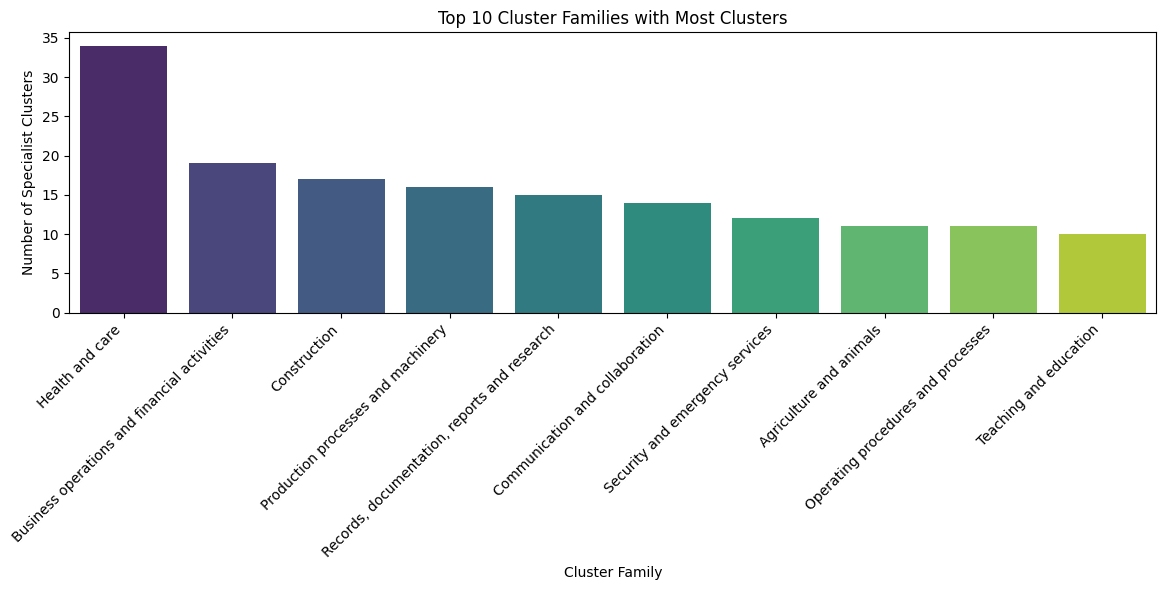

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by Cluster Family and count the number of Specialist Clusters
cluster_family_counts = st_hier_df.groupby('Cluster Family')['Specialist Cluster'].nunique().reset_index()

# Step 2: Sort by the number of clusters in descending order
cluster_family_counts = cluster_family_counts.sort_values(by='Specialist Cluster', ascending=False)

# Step 3: Select the top 10 cluster families with the most clusters
top_10_cluster_families = cluster_family_counts.head(10)

# Step 4: Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster Family', y='Specialist Cluster', data=top_10_cluster_families, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cluster Families with Most Clusters')
plt.xlabel('Cluster Family')
plt.ylabel('Number of Specialist Clusters')
plt.tight_layout()
plt.show()


In [21]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30450 entries, 0 to 30449
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type              30450 non-null  object 
 1   ANZSCO Code                  30450 non-null  int64  
 2   Sub-Profile Code             6516 non-null   object 
 3   ANZSCO Title                 30450 non-null  object 
 4   Specialist Task              30450 non-null  object 
 5   % of time spent on task      23934 non-null  float64
 6   Emerging/
Trending Flag      1402 non-null   object 
 7   Specialist Cluster           30450 non-null  object 
 8    % of time spent on cluster  23934 non-null  float64
 9   Cluster Family               30450 non-null  object 
 10  % of time spent on family    23934 non-null  float64
 11  Skills Statement             30450 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.8+ MB


In [22]:
print("There are",st_df['Occupation Type'].nunique(), "types of Occupations listed in Specialist Task Data")
print('These occupations are:', st_df['Occupation Type'].unique())
print("There are",st_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 4 types of Occupations listed in Specialist Task Data
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'Specialisation' 'NEC Category Occupation']
There are 1177 different occupations listed


<ipython-input-23-0dee8559d0aa>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster Family', y='Specialist Cluster', data=top_10_cluster_families_filtered, palette='viridis')


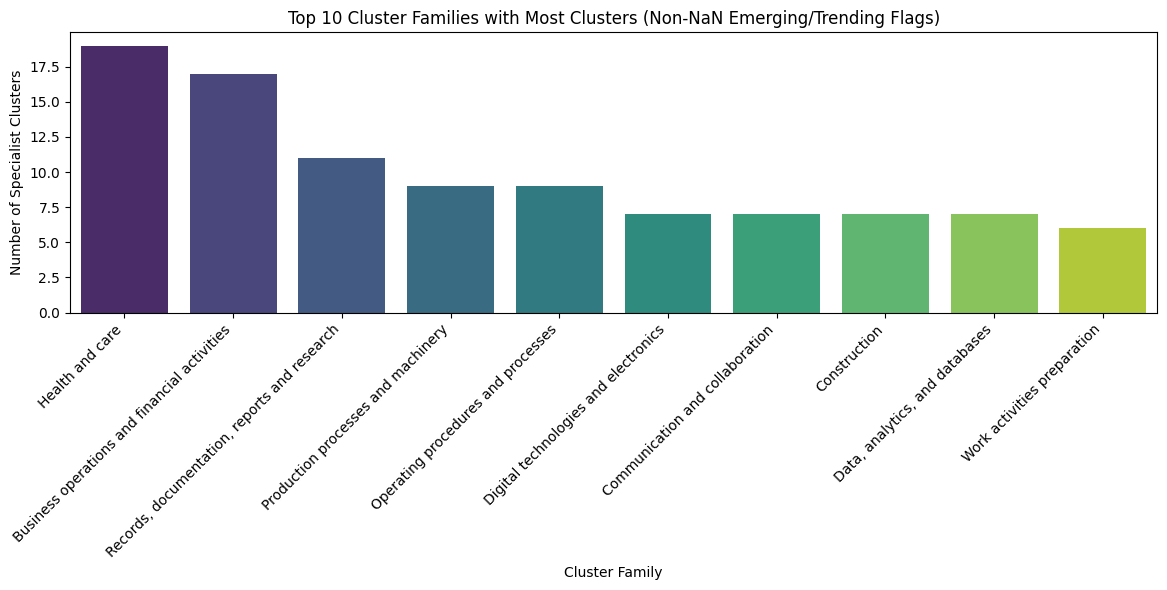

In [23]:
# Step 1: Filter the data where Emerging/Trending Flags is not NaN
filtered_df = st_df[st_df['Emerging/\nTrending Flag'].notna()]

# Step 2: Group by Cluster Family and count the number of Specialist Clusters
cluster_family_counts_filtered = filtered_df.groupby('Cluster Family')['Specialist Cluster'].nunique().reset_index()

# Step 3: Sort by the number of clusters in descending order
cluster_family_counts_filtered = cluster_family_counts_filtered.sort_values(by='Specialist Cluster', ascending=False)

# Step 4: Select the top 10 cluster families with the most clusters
top_10_cluster_families_filtered = cluster_family_counts_filtered.head(10)

# Step 5: Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster Family', y='Specialist Cluster', data=top_10_cluster_families_filtered, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cluster Families with Most Clusters (Non-NaN Emerging/Trending Flags)')
plt.xlabel('Cluster Family')
plt.ylabel('Number of Specialist Clusters')
plt.tight_layout()
plt.show()


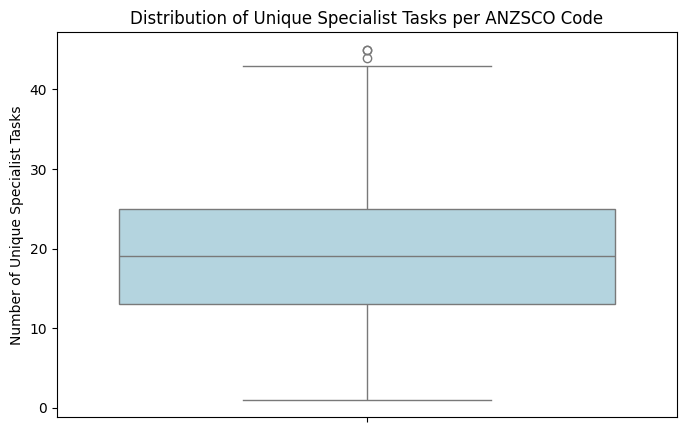

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique specialist tasks for each ANZSCO Code
st_counts = st_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Specialist Task"].nunique()

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=st_counts, color='lightblue')

# Labels and title
plt.ylabel("Number of Unique Specialist Tasks")
plt.title("Distribution of Unique Specialist Tasks per ANZSCO Code")

# Show plot
plt.show()


In [25]:
# Count unique specialist tasks for each ANZSCO Code
st_counts = st_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Specialist Task"].nunique()

# Get top 10 ANZSCO Codes with the highest number of specialist tasks
top_10 = st_counts.nlargest(10).reset_index()

# Display the result
print(top_10)


   ANZSCO Code                                       ANZSCO Title  \
0       262113                              Systems Administrator   
1       313113                                  Web Administrator   
2       249212                    Dance Teacher (Private Tuition)   
3         2412                            Primary School Teachers   
4       241213                             Primary School Teacher   
5       263111              Computer Network and Systems Engineer   
6       322313                               Welder (First Class)   
7         2413  Middle School Teachers / Intermediate School T...   
8       241311  Middle School Teacher / Intermediate School Te...   
9       262111                             Database Administrator   

   Specialist Task  
0               45  
1               45  
2               44  
3               43  
4               43  
5               41  
6               41  
7               40  
8               40  
9               40  


### EDA - Technology Tools Dataframes
1. Technology Tools Hierarchy
2. Technology Tools Data

In [26]:
tt_hier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Technology Tool Category              94 non-null     object
 1   Technology Tool Category Description  94 non-null     object
 2   Technology Tool                       94 non-null     object
 3   Technology Tool Description           94 non-null     object
 4   Technology Tool Extended Description  94 non-null     object
dtypes: object(5)
memory usage: 3.8+ KB


In [27]:
print("The number of Tech Tool Category in ASC data are:", tt_hier_df['Technology Tool Category'].nunique())
print("The number of Tech Tool in ASC data are:", tt_hier_df['Technology Tool'].nunique())




The number of Tech Tool Category in ASC data are: 27
The number of Tech Tool in ASC data are: 94


<ipython-input-28-38c09ba31622>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Technology Tool Category', y='Technology Tool', data=top_5_categories, palette='viridis')


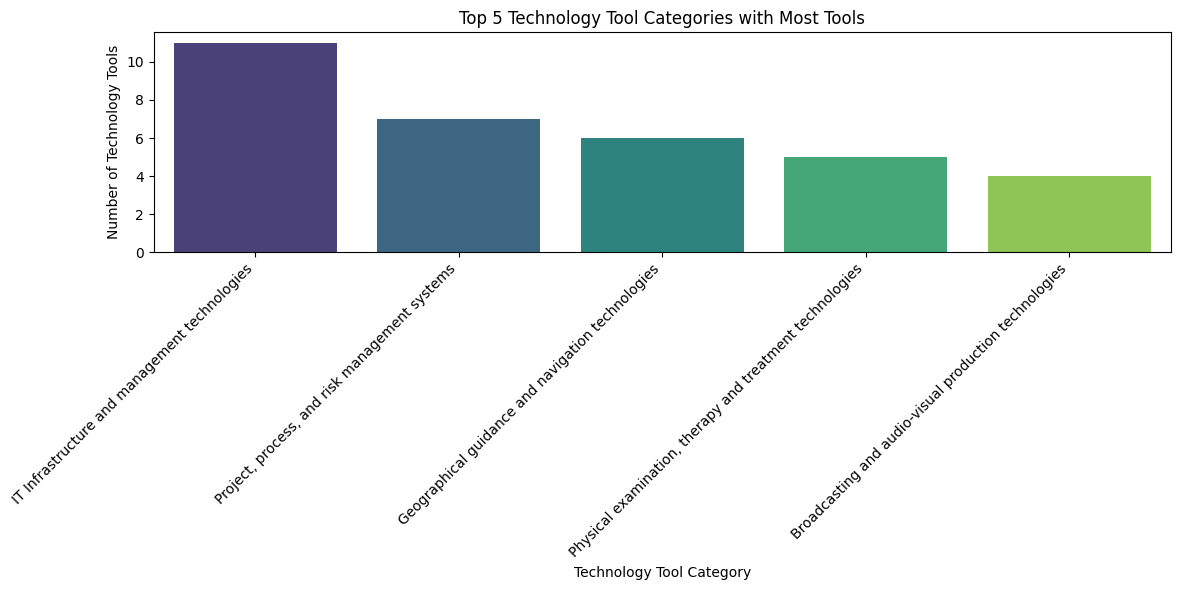

In [28]:
category_tool_counts = tt_hier_df.groupby('Technology Tool Category')['Technology Tool'].nunique().reset_index()

# Step 2: Sort by the number of tools in descending order
category_tool_counts = category_tool_counts.sort_values(by='Technology Tool', ascending=False)

# Step 3: Select the top 5 categories with the most tools
top_5_categories = category_tool_counts.head(5)

# Step 4: Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Technology Tool Category', y='Technology Tool', data=top_5_categories, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Technology Tool Categories with Most Tools')
plt.xlabel('Technology Tool Category')
plt.ylabel('Number of Technology Tools')
plt.tight_layout()
plt.show()

In [29]:
tt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5761 entries, 0 to 5760
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Occupation Type         5761 non-null   object
 1   ANZSCO Code             5761 non-null   int64 
 2   Sub-Profile Code        1300 non-null   object
 3   ANZSCO Title            5761 non-null   object
 4   Technology Tool         5761 non-null   object
 5   Emerging/Trending Flag  441 non-null    object
dtypes: int64(1), object(5)
memory usage: 270.2+ KB


In [30]:
print("There are",tt_df['Occupation Type'].nunique(), "types of Occupations listed in Specialist Task Data")
print('These occupations are:', tt_df['Occupation Type'].unique())
print("There are",tt_df['ANZSCO Title'].nunique(), "different occupations listed")

There are 4 types of Occupations listed in Specialist Task Data
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'NEC Category Occupation' 'Specialisation']
There are 1317 different occupations listed


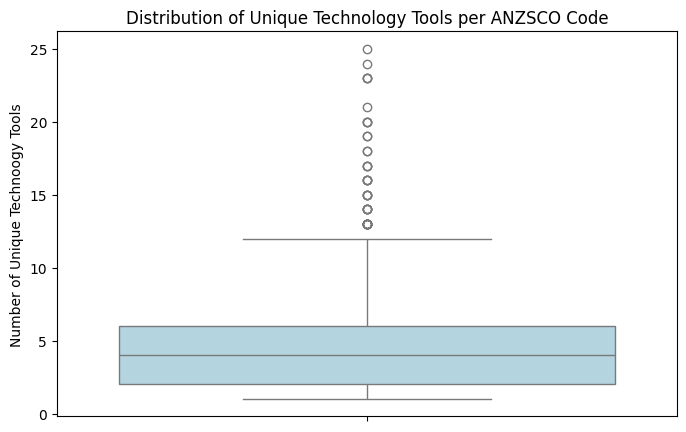

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique specialist tasks for each ANZSCO Code
tt_counts = tt_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Technology Tool"].nunique()

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=tt_counts, color='lightblue')

# Labels and title
plt.ylabel("Number of Unique Technoogy Tools")
plt.title("Distribution of Unique Technology Tools per ANZSCO Code")

# Show plot
plt.show()


In [32]:
# Count unique specialist tasks for each ANZSCO Code
tt_counts = tt_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Technology Tool"].nunique()

# Get top 10 ANZSCO Codes with the highest number of specialist tasks
top_10 = tt_counts.nlargest(10).reset_index()

# Display the result
print(top_10)


   ANZSCO Code                                       ANZSCO Title  \
0       262111                             Database Administrator   
1         2611                  ICT Business and Systems Analysts   
2       262113                              Systems Administrator   
3       263111              Computer Network and Systems Engineer   
4       263212                               ICT Support Engineer   
5         2621  Database and Systems Administrators, and ICT S...   
6       135199                                    Network Manager   
7       261111                               ICT Business Analyst   
8       263112                              Network Administrator   
9       261313                                  Software Engineer   

   Technology Tool  
0               25  
1               24  
2               23  
3               23  
4               23  
5               21  
6               20  
7               20  
8               20  
9               19  


In [33]:
tt_eg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Technology Tool          712 non-null    object
 1   Technology Tool Example  712 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


Number of Technology Tool Examples for each Technology Tool:
                                      Technology Tool  Technology Tool Example
0         Accounting and financial management systems                        5
1          Air, space, or watercraft guidance systems                        5
2     Alternative and complementary therapy equipment                       12
3               Application and load testing software                        8
4                         Application server software                        5
..                                                ...                      ...
89                       Virtual reality technologies                        5
90  Virtualised IT environments and terminal services                        5
91            Voice recognition and response software                        3
92                                   Wearable devices                       11
93             Web page creation and editing software                 

<ipython-input-34-03d4010d077f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Technology Tool', y='Technology Tool Example', data=tool_example_counts, palette='viridis')


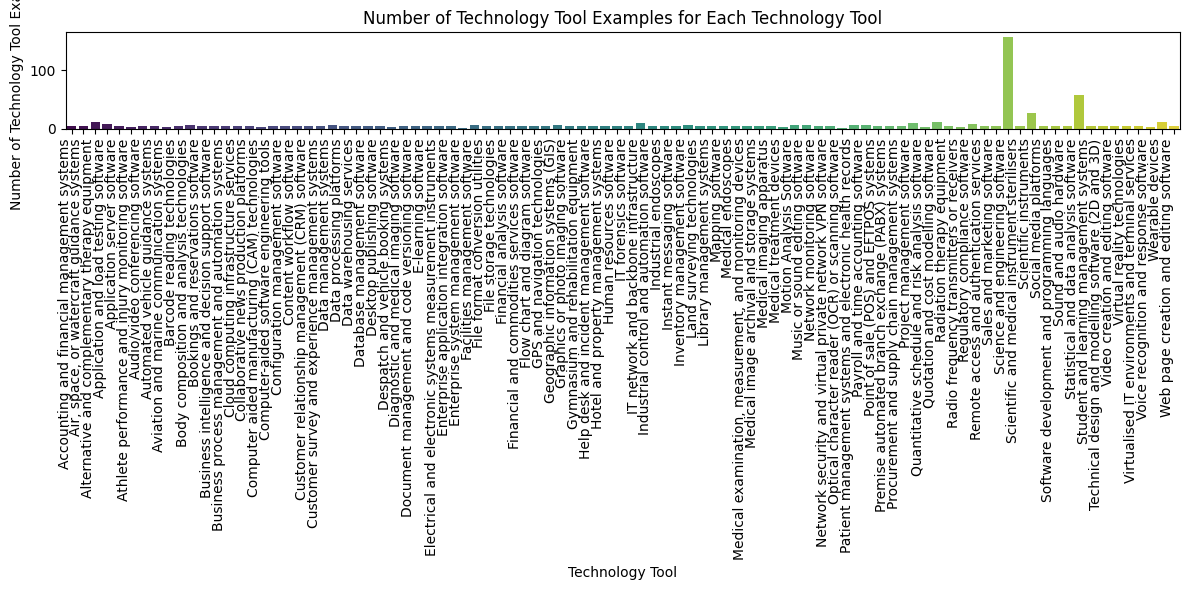

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by 'Technology Tool' and count the number of 'Technology Tool Example'
tool_example_counts = tt_eg.groupby('Technology Tool')['Technology Tool Example'].nunique().reset_index()

# Step 2: Display the table
print("Number of Technology Tool Examples for each Technology Tool:")
print(tool_example_counts)

# Step 3: Visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Technology Tool', y='Technology Tool Example', data=tool_example_counts, palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.title('Number of Technology Tool Examples for Each Technology Tool')
plt.xlabel('Technology Tool')
plt.ylabel('Number of Technology Tool Examples')
plt.tight_layout()
plt.show()


Top 10 Technology Tools with the Most Technology Tool Examples:
                                    Technology Tool  Technology Tool Example
79                 Science and engineering software                      157
85           Statistical and data analysis software                       58
81                           Scientific instruments                       27
2   Alternative and complementary therapy equipment                       12
92                                 Wearable devices                       11
73            Quotation and cost modelling software                       11
71                      Project management software                       10
48           IT network and backbone infrastructure                        9
3             Application and load testing software                        8
76                   Regulatory compliance software                        8


<ipython-input-35-ed63de03c6fc>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Technology Tool', y='Technology Tool Example', data=top_10_tool_example_counts, palette='viridis')


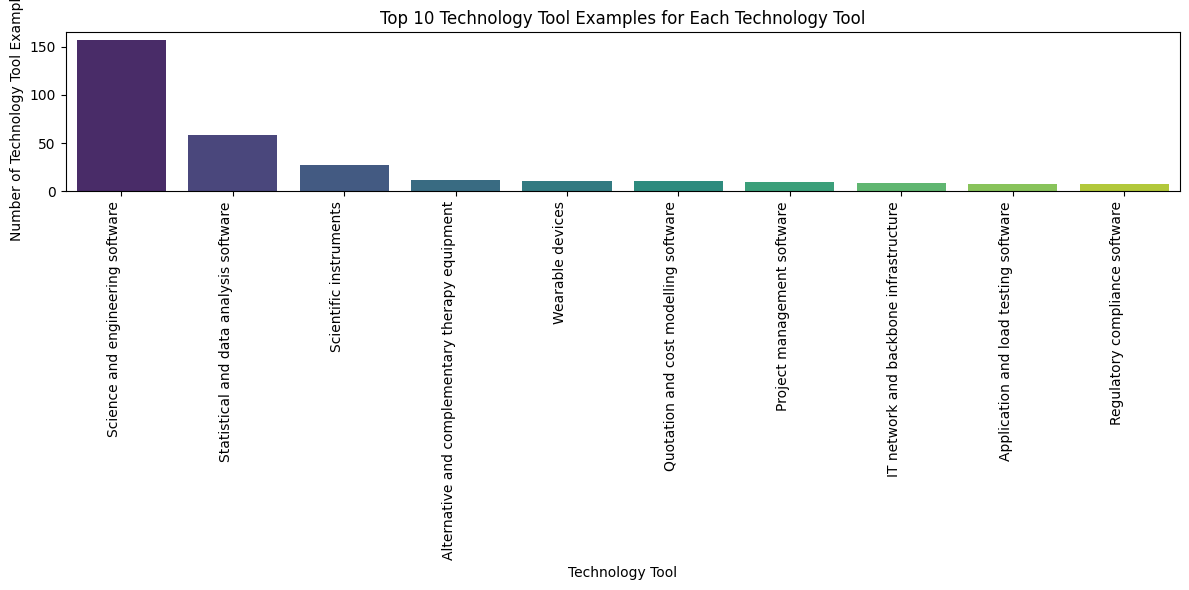

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by 'Technology Tool' and count the number of 'Technology Tool Example'
tool_example_counts = tt_eg.groupby('Technology Tool')['Technology Tool Example'].nunique().reset_index()

# Step 2: Sort by the number of Technology Tool Examples in descending order and get the top 10
top_10_tool_example_counts = tool_example_counts.sort_values(by='Technology Tool Example', ascending=False).head(10)

# Step 3: Display the table for top 10
print("Top 10 Technology Tools with the Most Technology Tool Examples:")
print(top_10_tool_example_counts)

# Step 4: Visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Technology Tool', y='Technology Tool Example', data=top_10_tool_example_counts, palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.title('Top 10 Technology Tool Examples for Each Technology Tool')
plt.xlabel('Technology Tool')
plt.ylabel('Number of Technology Tool Examples')
plt.tight_layout()
plt.show()


In [36]:
# Step 1: Group by 'Technology Tool' and count the unique 'Technology Tool Example'
tt_eg_count_df = tt_eg.groupby('Technology Tool')['Technology Tool Example'].nunique().reset_index()

# Step 2: Rename the columns for clarity (optional)
tt_eg_count_df.columns = ['Technology Tool', 'Technology Tool Example Count']

# Display the new DataFrame
print(tt_eg_count_df.head())  # Show the first few rows of the new DataFrame


                                   Technology Tool  \
0      Accounting and financial management systems   
1       Air, space, or watercraft guidance systems   
2  Alternative and complementary therapy equipment   
3            Application and load testing software   
4                      Application server software   

   Technology Tool Example Count  
0                              5  
1                              5  
2                             12  
3                              8  
4                              5  


## Merging Relevent Dataframes
1. This helps segmentise the project into 3 different approaches to answer multiple ASC related question

In [37]:
def merge_all_dataframes(df1, df2, df3, col_1, col_2):
    merged_df = df3.merge(df1, on=col_1, how="left")
    merged_df = merged_df.merge(df2, on=col_2, how="left")
    print("\nFinal Merged Dataset Sample:")
    print(merged_df.head())
    return merged_df



tt_merged_df = merge_all_dataframes(tt_df, occupation_df, tt_hier_df, "Technology Tool", "ANZSCO Code")
st_merged_df = merge_all_dataframes(st_hier_df, occupation_df, st_df, "Specialist Task", "ANZSCO Code")




Final Merged Dataset Sample:
                            Technology Tool Category  \
0  Broadcasting and audio-visual production techn...   
1  Broadcasting and audio-visual production techn...   
2  Broadcasting and audio-visual production techn...   
3  Broadcasting and audio-visual production techn...   
4  Broadcasting and audio-visual production techn...   

                Technology Tool Category Description  \
0  Systems for audio, video, multimedia and news ...   
1  Systems for audio, video, multimedia and news ...   
2  Systems for audio, video, multimedia and news ...   
3  Systems for audio, video, multimedia and news ...   
4  Systems for audio, video, multimedia and news ...   

                           Technology Tool  \
0  Collaborative news production platforms   
1  Collaborative news production platforms   
2  Collaborative news production platforms   
3  Collaborative news production platforms   
4  Collaborative news production platforms   

                   

In [38]:
# Step 1: Merge the DataFrames on 'Technology Tool'
tt_merged_df = pd.merge(tt_merged_df, tt_eg_count_df, on='Technology Tool', how='left')

# Step 2: Display the merged DataFrame
print("Merged DataFrame:")
print(tt_merged_df.head())  # Display the first few rows of the merged DataFrame


Merged DataFrame:
                            Technology Tool Category  \
0  Broadcasting and audio-visual production techn...   
1  Broadcasting and audio-visual production techn...   
2  Broadcasting and audio-visual production techn...   
3  Broadcasting and audio-visual production techn...   
4  Broadcasting and audio-visual production techn...   

                Technology Tool Category Description  \
0  Systems for audio, video, multimedia and news ...   
1  Systems for audio, video, multimedia and news ...   
2  Systems for audio, video, multimedia and news ...   
3  Systems for audio, video, multimedia and news ...   
4  Systems for audio, video, multimedia and news ...   

                           Technology Tool  \
0  Collaborative news production platforms   
1  Collaborative news production platforms   
2  Collaborative news production platforms   
3  Collaborative news production platforms   
4  Collaborative news production platforms   

                         Techno

In [39]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12910 entries, 0 to 12909
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Technology Tool Category              12910 non-null  object 
 1   Technology Tool Category Description  12910 non-null  object 
 2   Technology Tool                       12910 non-null  object 
 3   Technology Tool Description           12910 non-null  object 
 4   Technology Tool Extended Description  12910 non-null  object 
 5   Occupation Type_x                     12910 non-null  object 
 6   ANZSCO Code                           12910 non-null  int64  
 7   Sub-Profile Code_x                    7543 non-null   object 
 8   ANZSCO Title_x                        12910 non-null  object 
 9   Emerging/Trending Flag                556 non-null    object 
 10  Occupation Type_y                     12905 non-null  object 
 11  Sub-Profile Cod

In [40]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67772 entries, 0 to 67771
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            67772 non-null  object 
 1   ANZSCO Code                  67772 non-null  int64  
 2   Sub-Profile Code_x           39773 non-null  object 
 3   ANZSCO Title_x               67772 non-null  object 
 4   Specialist Task              67772 non-null  object 
 5   % of time spent on task      27999 non-null  float64
 6   Emerging/
Trending Flag      1700 non-null   object 
 7   Specialist Cluster_x         67772 non-null  object 
 8    % of time spent on cluster  27999 non-null  float64
 9   Cluster Family_x             67772 non-null  object 
 10  % of time spent on family    27999 non-null  float64
 11  Skills Statement             67772 non-null  object 
 12  Specialist Cluster_y         67772 non-null  object 
 13  Cluster Family_y

In [41]:
def merge_cc_df(df1, df2, df3):
    merged_df = pd.merge(df1, df3, on=["ANZSCO Code", "ANZSCO Title"], how="left")

    print("\nStep 1: Core Competencies merged with Occupation Data")
    print(merged_df.head())
    merged_df = pd.merge(merged_df, df2, on=["Core Competency", "Score"], how="left", suffixes=("", "_desc"))

    print("\nStep 2: Final Merged Dataset with Descriptions")
    print(merged_df.head())

    return merged_df


cc_merged_df = merge_cc_df(cc_df, cc_desc_df, occupation_df)


Step 1: Core Competencies merged with Occupation Data
  Occupation Type_x  ANZSCO Code  Sub-Profile Code_x  \
0          ANZSCO 6       422111                 NaN   
1          ANZSCO 6       422111                 NaN   
2          ANZSCO 6       422111                 NaN   
3          ANZSCO 6       422111                 NaN   
4          ANZSCO 6       422111                 NaN   

                                        ANZSCO Title  \
0  Aboriginal and Torres Strait Islander Educatio...   
1  Aboriginal and Torres Strait Islander Educatio...   
2  Aboriginal and Torres Strait Islander Educatio...   
3  Aboriginal and Torres Strait Islander Educatio...   
4  Aboriginal and Torres Strait Islander Educatio...   

             Core Competency  Score Proficiency Level  \
0         Digital engagement      5      Intermediate   
1  Initiative and innovation      8              High   
2                   Learning      5      Intermediate   
3                   Numeracy      4      In

In [42]:
cc_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            11030 non-null  object 
 1   ANZSCO Code                  11030 non-null  int64  
 2   Sub-Profile Code_x           0 non-null      float64
 3   ANZSCO Title                 11030 non-null  object 
 4   Core Competency              11030 non-null  object 
 5   Score                        11030 non-null  int64  
 6   Proficiency Level            11030 non-null  object 
 7   Anchor Value                 11030 non-null  object 
 8   Occupation Type_y            11030 non-null  object 
 9   Sub-Profile Code_y           0 non-null      object 
 10  ANZSCO Description           11030 non-null  object 
 11  Core Competency Description  11030 non-null  object 
 12  Proficiency Level_desc       11030 non-null  object 
 13  Anchor Value_des

### Tech Tools Merged Analysis

In [43]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12910 entries, 0 to 12909
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Technology Tool Category              12910 non-null  object 
 1   Technology Tool Category Description  12910 non-null  object 
 2   Technology Tool                       12910 non-null  object 
 3   Technology Tool Description           12910 non-null  object 
 4   Technology Tool Extended Description  12910 non-null  object 
 5   Occupation Type_x                     12910 non-null  object 
 6   ANZSCO Code                           12910 non-null  int64  
 7   Sub-Profile Code_x                    7543 non-null   object 
 8   ANZSCO Title_x                        12910 non-null  object 
 9   Emerging/Trending Flag                556 non-null    object 
 10  Occupation Type_y                     12905 non-null  object 
 11  Sub-Profile Cod

In [44]:
tt_merged_df.drop(columns=[ "Sub-Profile Code_y", "Occupation Type_y" , "ANZSCO Title_y" ], inplace=True)
tt_merged_df.columns

Index(['Technology Tool Category', 'Technology Tool Category Description',
       'Technology Tool', 'Technology Tool Description',
       'Technology Tool Extended Description', 'Occupation Type_x',
       'ANZSCO Code', 'Sub-Profile Code_x', 'ANZSCO Title_x',
       'Emerging/Trending Flag', 'ANZSCO Description',
       'Technology Tool Example Count'],
      dtype='object')

In [45]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12910 entries, 0 to 12909
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Technology Tool Category              12910 non-null  object 
 1   Technology Tool Category Description  12910 non-null  object 
 2   Technology Tool                       12910 non-null  object 
 3   Technology Tool Description           12910 non-null  object 
 4   Technology Tool Extended Description  12910 non-null  object 
 5   Occupation Type_x                     12910 non-null  object 
 6   ANZSCO Code                           12910 non-null  int64  
 7   Sub-Profile Code_x                    7543 non-null   object 
 8   ANZSCO Title_x                        12910 non-null  object 
 9   Emerging/Trending Flag                556 non-null    object 
 10  ANZSCO Description                    12905 non-null  object 
 11  Technology Tool

In [46]:
tt_merged_df.head()

,Technology Tool Category,Technology Tool Category Description,Technology Tool,Technology Tool Description,Technology Tool Extended Description,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title_x,Emerging/Trending Flag,ANZSCO Description,Technology Tool Example Count
0,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 4,2123,NaN,"Film, Television, Radio and Stage Directors",NaN,"Film, Television, Radio and Stage Directors di...",5.0
1,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 4,2124,NaN,Journalists and Other Writers,NaN,Journalists and Other Writers research and com...,5.0
2,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 6,212113,NaN,Radio Presenter,NaN,"Prepares and presents news, sports or other in...",5.0
3,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 6,212312,NaN,"Director (Film, Television, Radio or Stage)",NaN,"Interprets and approves selection of scripts, ...",5.0
4,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 6,212315,NaN,Program Director (Television or Radio),NaN,Compiles and directs programs for television o...,5.0


In [47]:
tt_merged_df.sort_values(by="ANZSCO Code", inplace=True)
tt_merged_df.head()

,Technology Tool Category,Technology Tool Category Description,Technology Tool,Technology Tool Description,Technology Tool Extended Description,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title_x,Emerging/Trending Flag,ANZSCO Description,Technology Tool Example Count
10475,"Project, process, and risk management systems","Systems to manage projects, risks, regulatory ...",Project management software,"Software for planning, documenting, and managi...",Project management software incorporates softw...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...,10.0
2017,Data analysis and reporting platforms,Software for data analysis and produce electro...,Statistical and data analysis software,Software used to support the process of analys...,Statistical and data analysis software encompa...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...,58.0
9153,Payroll and human resource management platforms,Systems to undertake human resource management...,Human resources software,Software and systems used to manage employee a...,Human resources software encompasses software ...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...,5.0
447,Communication technologies,"Data, voice and/or video communication platforms",Audio/video conferencing software,Software for collaboration using video or audi...,Audio/video conferencing software enables peop...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...,5.0
5152,Graphic design and imagery technologies,Software for graphic design and photographic e...,Flow chart and diagram software,Software used to create 2D and 3D diagrams and...,Flow chart and diagram software incorporates s...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...,5.0


### Specialised Task Merged Analysis

In [48]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67772 entries, 0 to 67771
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            67772 non-null  object 
 1   ANZSCO Code                  67772 non-null  int64  
 2   Sub-Profile Code_x           39773 non-null  object 
 3   ANZSCO Title_x               67772 non-null  object 
 4   Specialist Task              67772 non-null  object 
 5   % of time spent on task      27999 non-null  float64
 6   Emerging/
Trending Flag      1700 non-null   object 
 7   Specialist Cluster_x         67772 non-null  object 
 8    % of time spent on cluster  27999 non-null  float64
 9   Cluster Family_x             67772 non-null  object 
 10  % of time spent on family    27999 non-null  float64
 11  Skills Statement             67772 non-null  object 
 12  Specialist Cluster_y         67772 non-null  object 
 13  Cluster Family_y

In [49]:
st_merged_df = st_merged_df.rename(columns={'Emerging/\nTrending Flag': 'Emerging/Trending Flag'})
st_merged_df.drop(columns=[ "Sub-Profile Code_y", "Specialist Cluster_y", "Cluster Family_y" , "ANZSCO Title_y", "Occupation Type_y", "Skill Statement" ], inplace=True)
st_merged_df.columns

Index(['Occupation Type_x', 'ANZSCO Code', 'Sub-Profile Code_x',
       'ANZSCO Title_x', 'Specialist Task', '% of time spent on task',
       'Emerging/Trending Flag', 'Specialist Cluster_x',
       ' % of time spent on cluster', 'Cluster Family_x',
       '% of time spent on family', 'Skills Statement', 'ANZSCO Description'],
      dtype='object')

In [50]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67772 entries, 0 to 67771
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            67772 non-null  object 
 1   ANZSCO Code                  67772 non-null  int64  
 2   Sub-Profile Code_x           39773 non-null  object 
 3   ANZSCO Title_x               67772 non-null  object 
 4   Specialist Task              67772 non-null  object 
 5   % of time spent on task      27999 non-null  float64
 6   Emerging/Trending Flag       1700 non-null   object 
 7   Specialist Cluster_x         67772 non-null  object 
 8    % of time spent on cluster  27999 non-null  float64
 9   Cluster Family_x             67772 non-null  object 
 10  % of time spent on family    27999 non-null  float64
 11  Skills Statement             67772 non-null  object 
 12  ANZSCO Description           67772 non-null  object 
dtypes: float64(3), i

In [51]:
st_merged_df.head()

,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title_x,Specialist Task,% of time spent on task,Emerging/Trending Flag,Specialist Cluster_x,% of time spent on cluster,Cluster Family_x,% of time spent on family,Skills Statement,ANZSCO Description
0,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,Direct or manage financial activities or opera...,0.1302,NaN,"Manage, monitor and undertake financial activi...",0.1644,Business operations and financial activities,0.5322,Direct and oversee the financial operations of...,Chief Executives and Managing Directors determ...
1,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,Direct department or organisational activities,0.1117,Trending,"Manage services, staff or activities",0.2128,Business operations and financial activities,0.5322,Direct and oversee the activities of a work un...,Chief Executives and Managing Directors determ...
2,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,"Direct sales, marketing or customer service ac...",0.0808,NaN,"Manage services, staff or activities",0.2128,Business operations and financial activities,0.5322,"Direct and oversee the sales, marketing, or cu...",Chief Executives and Managing Directors determ...
3,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,"Communicate with others to arrange, coordinate...",0.0665,NaN,Communicate or collaborate with others,0.0750,Communication and collaboration,0.0890,"Coordinate with others in order to plan, organ...",Chief Executives and Managing Directors determ...
4,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,Analyse data to assess operational or project ...,0.0651,NaN,Use data to inform operational decisions,0.1009,"Data, analytics, and databases",0.1370,Analyse qualitative and quantitative data aris...,Chief Executives and Managing Directors determ...


### Core Competencies Merged Analysis

In [52]:
cc_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            11030 non-null  object 
 1   ANZSCO Code                  11030 non-null  int64  
 2   Sub-Profile Code_x           0 non-null      float64
 3   ANZSCO Title                 11030 non-null  object 
 4   Core Competency              11030 non-null  object 
 5   Score                        11030 non-null  int64  
 6   Proficiency Level            11030 non-null  object 
 7   Anchor Value                 11030 non-null  object 
 8   Occupation Type_y            11030 non-null  object 
 9   Sub-Profile Code_y           0 non-null      object 
 10  ANZSCO Description           11030 non-null  object 
 11  Core Competency Description  11030 non-null  object 
 12  Proficiency Level_desc       11030 non-null  object 
 13  Anchor Value_des

In [53]:
cc_merged_df.drop(columns=[ "Sub-Profile Code_y" , "Occupation Type_y"], inplace=True)
cc_merged_df.columns

Index(['Occupation Type_x', 'ANZSCO Code', 'Sub-Profile Code_x',
       'ANZSCO Title', 'Core Competency', 'Score', 'Proficiency Level',
       'Anchor Value', 'ANZSCO Description', 'Core Competency Description',
       'Proficiency Level_desc', 'Anchor Value_desc'],
      dtype='object')

In [54]:
cc_merged_df.drop(columns=[ "Anchor Value_desc" , "Proficiency Level_desc"], inplace=True)
cc_merged_df.columns

Index(['Occupation Type_x', 'ANZSCO Code', 'Sub-Profile Code_x',
       'ANZSCO Title', 'Core Competency', 'Score', 'Proficiency Level',
       'Anchor Value', 'ANZSCO Description', 'Core Competency Description'],
      dtype='object')

In [55]:
cc_merged_df.head()

,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title,Core Competency,Score,Proficiency Level,Anchor Value,ANZSCO Description,Core Competency Description
0,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Digital engagement,5,Intermediate,Build and maintain an effective online profile...,Assists Aboriginal and Torres Strait Islander ...,Identifying and using technology (including ha...
1,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Initiative and innovation,8,High,Negotiate a price and sales terms then prepare...,Assists Aboriginal and Torres Strait Islander ...,"Taking on responsibilities and challenges, bei..."
2,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Learning,5,Intermediate,Learn a new filing system that groups document...,Assists Aboriginal and Torres Strait Islander ...,Understanding the implications of new informat...
3,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Numeracy,4,Intermediate,Use a blood pressure machine and accurately re...,Assists Aboriginal and Torres Strait Islander ...,Using mathematics to solve problems and interp...
4,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Oral communication,7,Intermediate,Participate in a work meeting and ask appropri...,Assists Aboriginal and Torres Strait Islander ...,The ability to communicate information and ide...


## NLP Pipeline

###New Approach combine jobs

#### CC

##### CC EDA


In [295]:
cc_nlp = cc_merged_df.copy()

In [296]:
cc_nlp.head()

,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title,Core Competency,Score,Proficiency Level,Anchor Value,ANZSCO Description,Core Competency Description
0,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Digital engagement,5,Intermediate,Build and maintain an effective online profile...,Assists Aboriginal and Torres Strait Islander ...,Identifying and using technology (including ha...
1,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Initiative and innovation,8,High,Negotiate a price and sales terms then prepare...,Assists Aboriginal and Torres Strait Islander ...,"Taking on responsibilities and challenges, bei..."
2,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Learning,5,Intermediate,Learn a new filing system that groups document...,Assists Aboriginal and Torres Strait Islander ...,Understanding the implications of new informat...
3,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Numeracy,4,Intermediate,Use a blood pressure machine and accurately re...,Assists Aboriginal and Torres Strait Islander ...,Using mathematics to solve problems and interp...
4,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Oral communication,7,Intermediate,Participate in a work meeting and ask appropri...,Assists Aboriginal and Torres Strait Islander ...,The ability to communicate information and ide...


In [297]:
import pandas as pd

# Assuming your DataFrame is named df
# Example DataFrame for context:
# df = pd.DataFrame(...)

# Group by 'ANZSCO Title' and aggregate the other columns
cc_nlp_2 = cc_nlp.groupby('ANZSCO Title').agg(
    {
        'Occupation Type_x': 'first',  # Keep the first value
        'ANZSCO Code': 'first',        # Keep the first value
        'Sub-Profile Code_x': 'first', # Keep the first value
        'Anchor Value': ' '.join,      # Merge the Anchor Value into a single string
        'ANZSCO Description': 'first'  # Keep the first value
    }
).reset_index()

# Rename 'Anchor Value' column to 'Anchor Value Merged'
cc_nlp_2.rename(columns={'Anchor Value': 'Anchor Value Merged'}, inplace=True)

# Print the new DataFrame
print(cc_nlp_2.head())


                                        ANZSCO Title Occupation Type_x  \
0  Aboriginal and Torres Strait Islander Educatio...          ANZSCO 6   
1  Aboriginal and Torres Strait Islander Health W...          ANZSCO 6   
2                               Accountant (General)          ANZSCO 6   
3                                        Accountants          ANZSCO 4   
4                                  Accounting Clerks          ANZSCO 4   

   ANZSCO Code  Sub-Profile Code_x  \
0       422111                 NaN   
1       411511                 NaN   
2       221111                 NaN   
3         2211                 NaN   
4         5511                 NaN   

                                 Anchor Value Merged  \
0  Build and maintain an effective online profile...   
1  Use software on a portable device to document ...   
2  Write software for keeping track of items in a...   
3  Write software for keeping track of items in a...   
4  Use software on a portable device to docume

In [298]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import nltk
import re

# Download NLTK stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

# Example text from 'Technology Tool Extended Description'


# Step 1: Pre-process the text before tokenization
def clean_text(text):
    # Remove extra spaces, symbols, and digits
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and symbols
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower().strip()  # Convert to lowercase and remove leading/trailing whitespaces
    return text

# Apply the text cleaning function
cc_nlp_2['Anchor Value Merged'] = cc_nlp_2['Anchor Value Merged'].apply(clean_text)

# Check the changes in the DataFrame
cc_nlp_2.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ANZSCO Title,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,Anchor Value Merged,ANZSCO Description
0,Aboriginal and Torres Strait Islander Educatio...,ANZSCO 6,422111,NaN,build and maintain an effective online profile...,Assists Aboriginal and Torres Strait Islander ...
1,Aboriginal and Torres Strait Islander Health W...,ANZSCO 6,411511,NaN,use software on a portable device to document ...,"Liaises with patients, clients, visitors to ho..."
2,Accountant (General),ANZSCO 6,221111,NaN,write software for keeping track of items in a...,Provides services relating to compliance-based...
3,Accountants,ANZSCO 4,2211,NaN,write software for keeping track of items in a...,Accountants provide services relating to finan...
4,Accounting Clerks,ANZSCO 4,5511,NaN,use software on a portable device to document ...,Accounting Clerks monitor creditor and debtor ...


In [299]:
from nltk.tokenize import word_tokenize
import nltk

# Ensure that the necessary NLTK data is downloaded
nltk.download('punkt')

# Step 1: Tokenize the text in the 'Anchor Value' column
w_stopword_tokens = cc_nlp_2['Anchor Value Merged'].apply(word_tokenize)

# Step 2: Check the changes in the DataFrame
cc_nlp_2.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ANZSCO Title,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,Anchor Value Merged,ANZSCO Description
0,Aboriginal and Torres Strait Islander Educatio...,ANZSCO 6,422111,NaN,build and maintain an effective online profile...,Assists Aboriginal and Torres Strait Islander ...
1,Aboriginal and Torres Strait Islander Health W...,ANZSCO 6,411511,NaN,use software on a portable device to document ...,"Liaises with patients, clients, visitors to ho..."
2,Accountant (General),ANZSCO 6,221111,NaN,write software for keeping track of items in a...,Provides services relating to compliance-based...
3,Accountants,ANZSCO 4,2211,NaN,write software for keeping track of items in a...,Accountants provide services relating to finan...
4,Accounting Clerks,ANZSCO 4,5511,NaN,use software on a portable device to document ...,Accounting Clerks monitor creditor and debtor ...


In [305]:
w_stopword_tokens.head()

,Anchor Value Merged
0,"[build, and, maintain, an, effective, online, ..."
1,"[use, software, on, a, portable, device, to, d..."
2,"[write, software, for, keeping, track, of, ite..."
3,"[write, software, for, keeping, track, of, ite..."
4,"[use, software, on, a, portable, device, to, d..."


In [306]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Perform lemmatization on tokenized words
lemmatized_stop_values = w_stopword_tokens.apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Print sample output
print(lemmatized_stop_values.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [build, and, maintain, an, effective, online, ...
1    [use, software, on, a, portable, device, to, d...
2    [write, software, for, keeping, track, of, ite...
3    [write, software, for, keeping, track, of, ite...
4    [use, software, on, a, portable, device, to, d...
Name: Anchor Value Merged, dtype: object


In [308]:
"""tokenized_anchor_values = cc_nlp_2['Anchor Value Merged'].apply(word_tokenize)

# Now you can access the tokenized values using this variable
print(tokenized_anchor_values.head())"""

"tokenized_anchor_values = cc_nlp_2['Anchor Value Merged'].apply(word_tokenize)\n\n# Now you can access the tokenized values using this variable\nprint(tokenized_anchor_values.head())"

In [307]:
import pandas as pd

# Assuming you have lemmatized tokens in the 'Lemmatized Anchor Value' column
# Flatten the lemmatized tokens into a Series
lemmatized_tokens = w_stopword_tokens.explode()

# Create a pandas Series to calculate summary statistics
lemmatized_tokens_series = pd.Series(lemmatized_tokens)

# Get summary statistics using describe() for lemmatized tokens
print("Tokenized Tokens Summary:")
print(lemmatized_tokens_series.describe())


Tokenized Tokens Summary:
count     131823
unique       489
top            a
freq       11711
Name: Anchor Value Merged, dtype: object


In [309]:
"""from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Perform lemmatization on tokenized words
lemmatized_anchor_values = tokenized_anchor_values.apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Print sample output
print(lemmatized_anchor_values.head())
"""

"from nltk.tokenize import word_tokenize\nfrom nltk.stem import WordNetLemmatizer\nimport nltk\n\n# Ensure necessary NLTK data is downloaded\nnltk.download('punkt')\nnltk.download('wordnet')\n\n# Initialize lemmatizer\nlemmatizer = WordNetLemmatizer()\n\n# Perform lemmatization on tokenized words\nlemmatized_anchor_values = tokenized_anchor_values.apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])\n\n# Print sample output\nprint(lemmatized_anchor_values.head())\n"

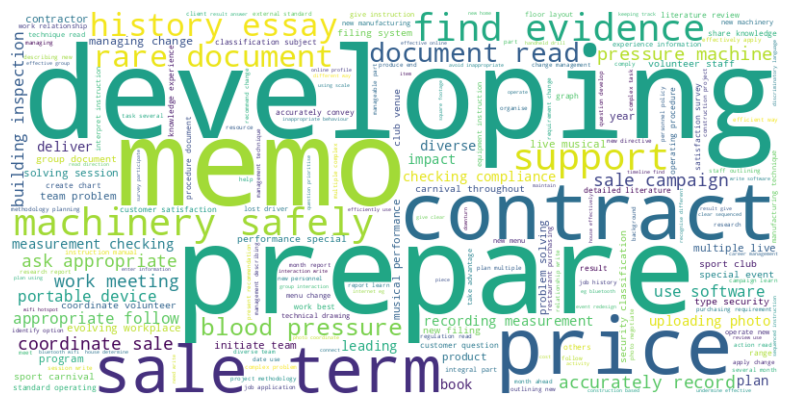

In [310]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of lemmatized words and join them into a single string
lemmatized_text = ' '.join([' '.join(words) for words in lemmatized_stop_values])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lemmatized_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()


<ipython-input-311-4866cc9b7950>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


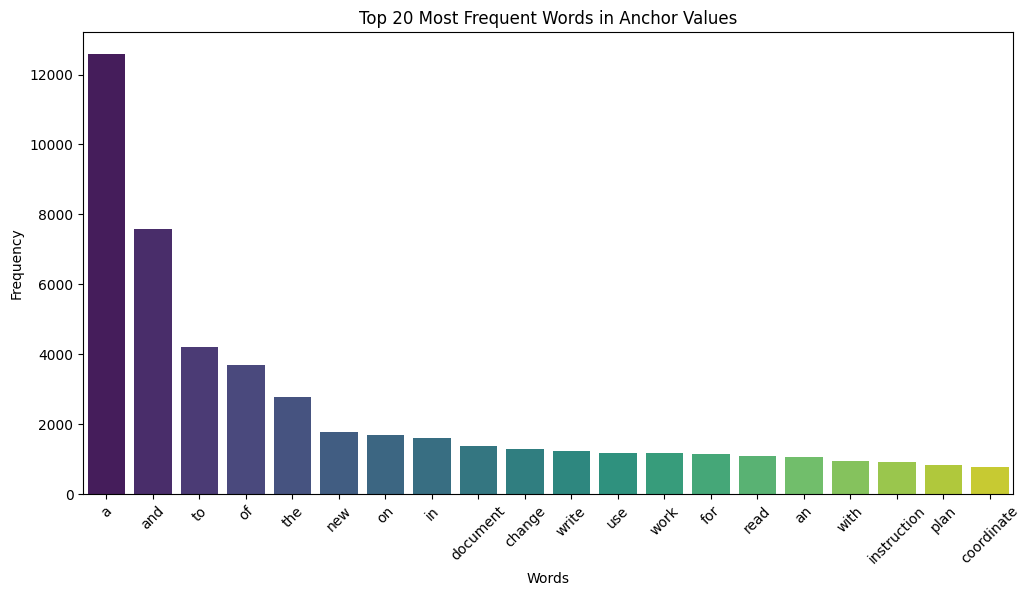

In [311]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten the list of lemmatized words
all_words = [word for words in lemmatized_stop_values for word in words]

# Count word frequencies
word_freq = Counter(all_words)

# Get the top 20 most common words
top_words = word_freq.most_common(20)

# Convert to lists for plotting
words, counts = zip(*top_words)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")

# Labels and title
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Anchor Values")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-312-aaf8bf14156f>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


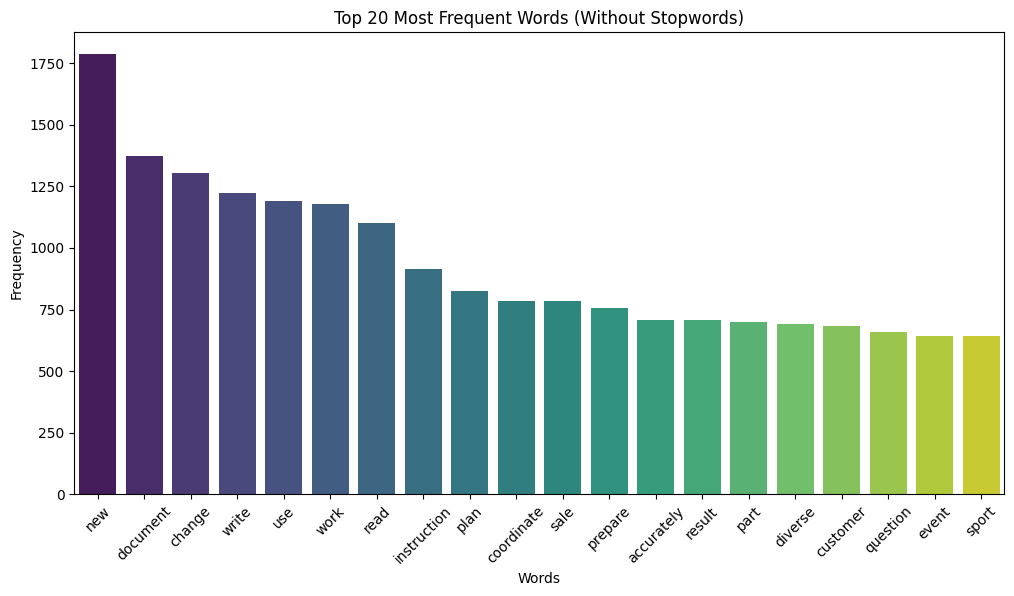

In [312]:
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

# Ensure stopwords are downloaded
nltk.download('stopwords')

# Get the English stopwords set
stop_words = set(stopwords.words('english'))

# Remove stopwords from the lemmatized words
filtered_words = [[word for word in words if word.lower() not in stop_words] for words in lemmatized_stop_values]

# Flatten the list after removing stopwords
all_words_filtered = [word for words in filtered_words for word in words]

# Count word frequencies
word_freq_filtered = Counter(all_words_filtered)

# Get the top 20 most common words
top_words_filtered = word_freq_filtered.most_common(20)

# Convert to lists for plotting
words, counts = zip(*top_words_filtered)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")

# Labels and title
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words (Without Stopwords)")
plt.show()


In [313]:
print("Lemmatized data:")
print(f"1. {' '.join(filtered_words[0])}")
print(f"2. {' '.join(filtered_words[1])}")
print(f"3. {' '.join(filtered_words[2])}")

Lemmatized data:
1. build maintain effective online profile career management negotiate price sale term prepare contract house learn new filing system group document type security classification subject date use blood pressure machine accurately record result participate work meeting ask appropriate follow question develop program multiple live musical performance special event sport carnival throughout year sport club venue coordinate volunteer staff contractor deliver event find evidence support history essay rare document read interpret instruction technical drawing equipment instruction manual work range subject matter expert diverse perspective achieve challenging goal write memo staff outlining new directive
2. use software portable device document building inspection recording measurement checking compliance uploading photo negotiate price sale term prepare contract house effectively apply change management technique managing diverse team use blood pressure machine accurately re

In [319]:
from nltk.corpus import stopwords

# Ensure necessary NLTK data is downloaded
nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from lemmatized_stop_values
lemmatized_clean_values = lemmatized_stop_values.apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

# Print sample output of lemmatized_clean_values
print(lemmatized_clean_values.head())


0    [build, maintain, effective, online, profile, ...
1    [use, software, portable, device, document, bu...
2    [write, software, keeping, track, item, invent...
3    [write, software, keeping, track, item, invent...
4    [use, software, portable, device, document, bu...
Name: Anchor Value Merged, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



🔹 Top 20 Bigrams:
negotiate price: 402
price sale: 402
sale term: 402
term prepare: 402
prepare contract: 402
contract house: 402
machinery safely: 396
find evidence: 391
evidence support: 391
support history: 391
history essay: 391
essay rare: 391
rare document: 391
document read: 391
use blood: 389
blood pressure: 389
pressure machine: 389
machine accurately: 389
accurately record: 389
record result: 389

🔹 Top 20 Trigrams:
negotiate price sale: 402
price sale term: 402
sale term prepare: 402
term prepare contract: 402
prepare contract house: 402
find evidence support: 391
evidence support history: 391
support history essay: 391
history essay rare: 391
essay rare document: 391
rare document read: 391
use blood pressure: 389
blood pressure machine: 389
pressure machine accurately: 389
machine accurately record: 389
accurately record result: 389
coordinate sale campaign: 381
participate work meeting: 377
work meeting ask: 377
meeting ask appropriate: 377


<ipython-input-320-b4914f0a317c>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


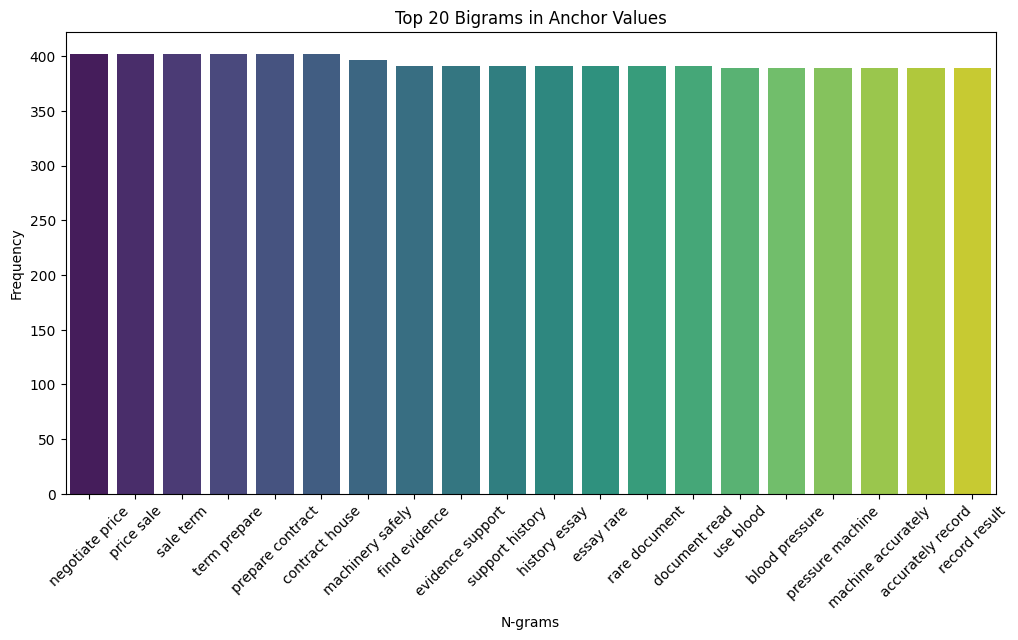

<ipython-input-320-b4914f0a317c>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


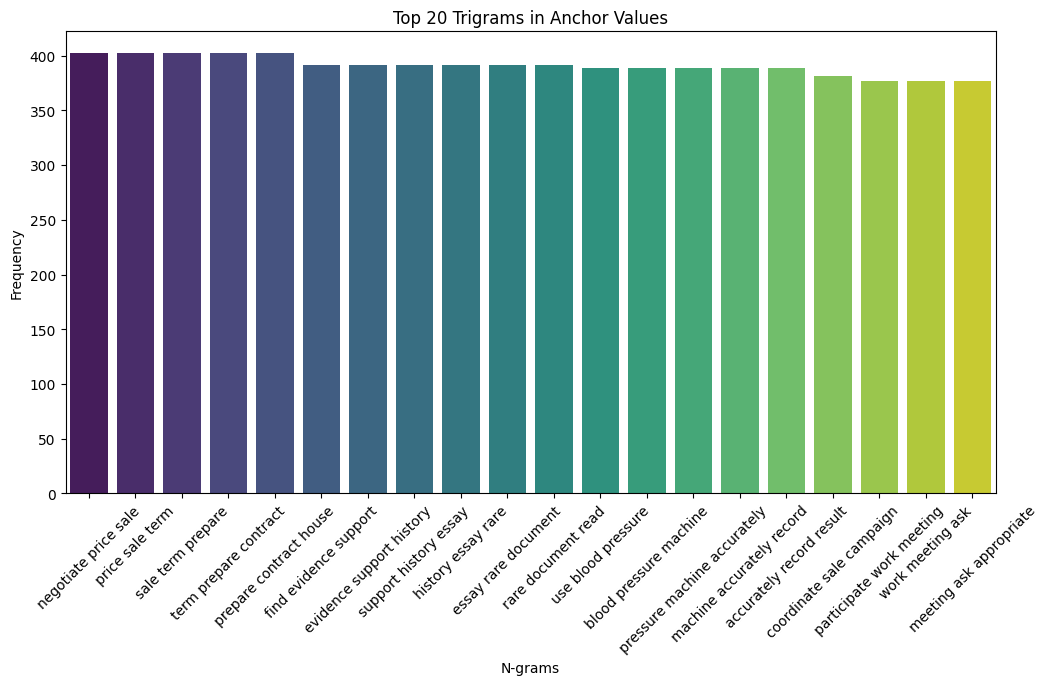

In [320]:
from nltk.util import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a single flattened list of words after removing stopwords
filtered_words_flat = [word for words in filtered_words for word in words]

# Generate bigrams and trigrams
bigrams = list(ngrams(filtered_words_flat, 2))
trigrams = list(ngrams(filtered_words_flat, 3))

# Count frequency of bigrams and trigrams
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Get the top 20 most common bigrams and trigrams
top_20_bigrams = bigram_freq.most_common(20)
top_20_trigrams = trigram_freq.most_common(20)

# Display the top 20 bigrams and trigrams with counts
print("\n🔹 Top 20 Bigrams:")
for bigram, count in top_20_bigrams:
    print(f"{' '.join(bigram)}: {count}")

print("\n🔹 Top 20 Trigrams:")
for trigram, count in top_20_trigrams:
    print(f"{' '.join(trigram)}: {count}")

# Function to plot bigrams/trigrams
def plot_ngrams(ngrams_list, title):
    ngram_labels, ngram_counts = zip(*ngrams_list)
    ngram_labels = [' '.join(ngram) for ngram in ngram_labels]  # Convert tuples to strings

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

# Plot Bigrams
plot_ngrams(top_20_bigrams, "Top 20 Bigrams in Anchor Values")

# Plot Trigrams
plot_ngrams(top_20_trigrams, "Top 20 Trigrams in Anchor Values")


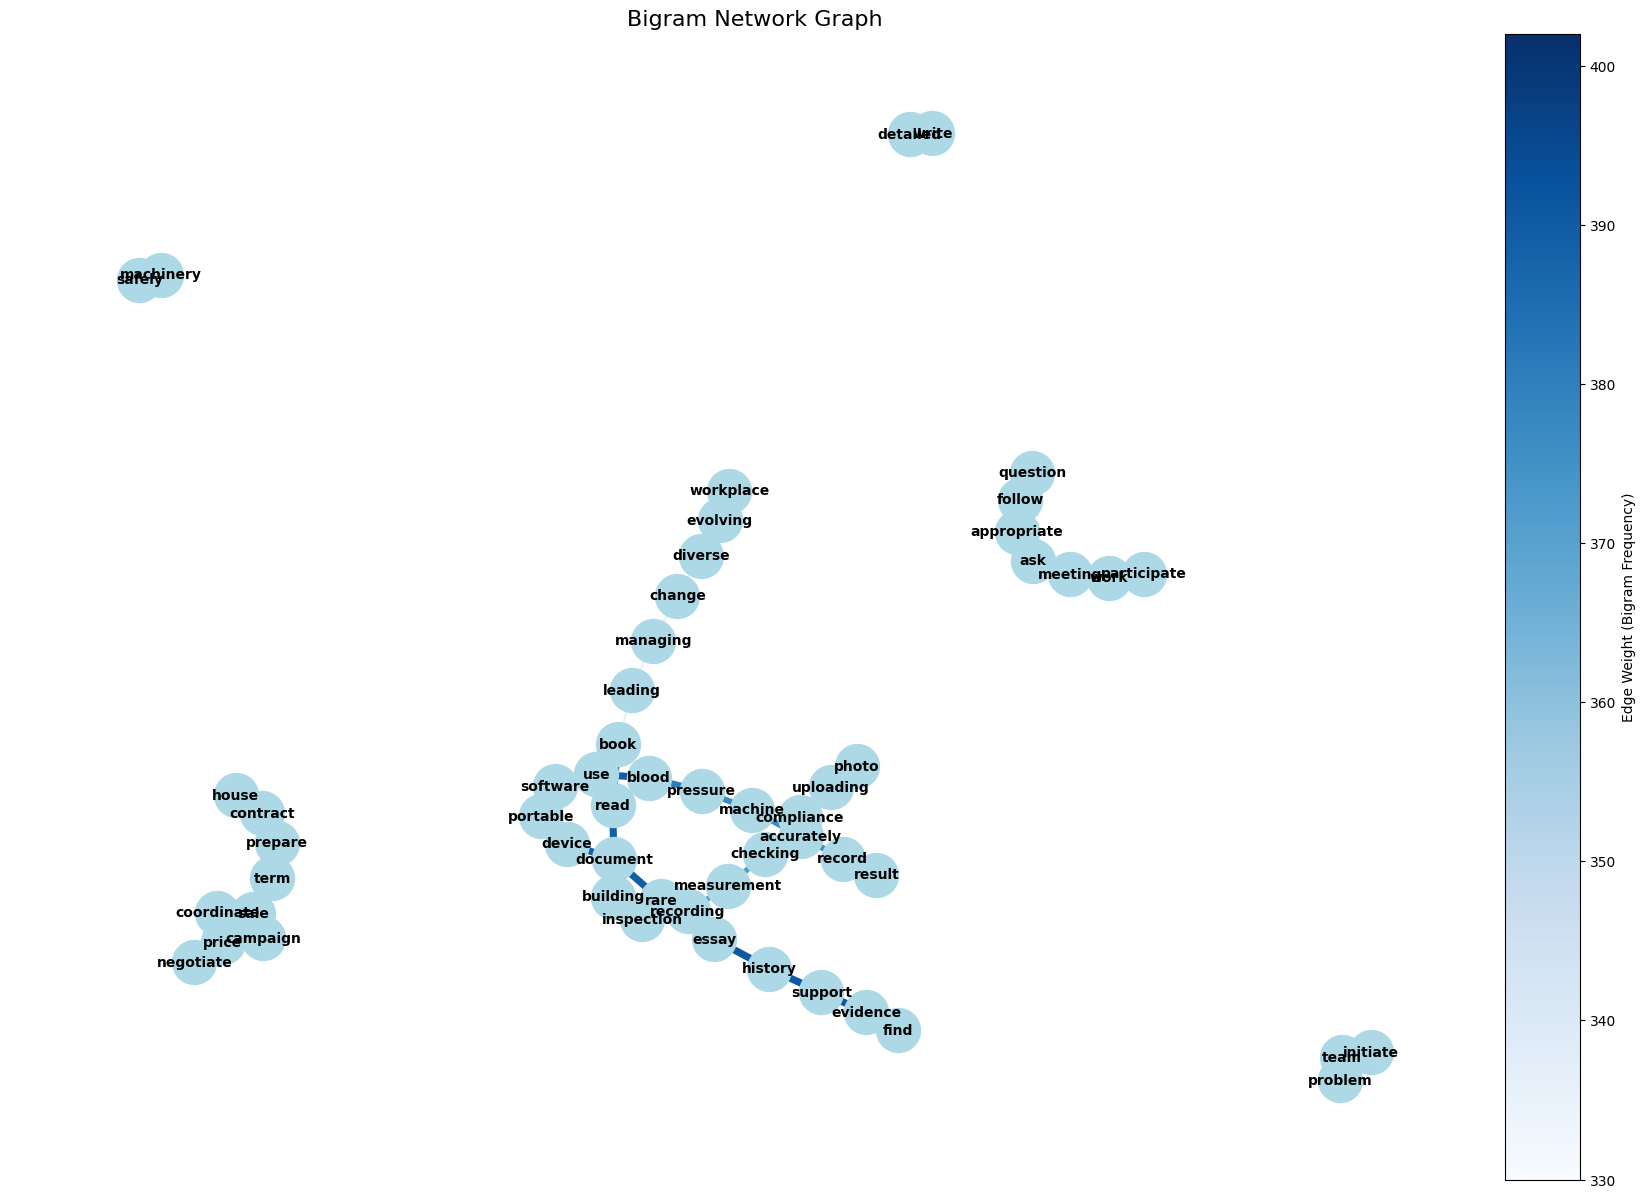

In [322]:
import nltk
from nltk.util import bigrams
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming 'lemmatized_anchor_values' is already a list of lists (tokenized words)
all_words = [word for words in lemmatized_clean_values for word in words]  # Flatten the list

# Define the function to plot bigram network
def plot_bigram_network(words, n=50):
    if not words:
        print("No words found. Ensure that 'lemmatized_anchor_values' contains data.")
        return

    # Get bigrams from words and count frequencies
    bigram_freq = Counter(bigrams(words))

    # Create a network graph
    G = nx.Graph()
    edge_width = []
    edge_color = []

    for bigram, count in bigram_freq.most_common(n):
        G.add_edge(bigram[0], bigram[1], weight=count)
        edge_width.append(count)
        edge_color.append(count)

    # Normalize edge widths for better visualization
    if edge_width:
        edge_width = np.array(edge_width, dtype=float)
        if edge_width.max() > edge_width.min():
            edge_width = 1 + (edge_width - edge_width.min()) * 5 / (edge_width.max() - edge_width.min())
        else:
            edge_width = np.full_like(edge_width, 3)  # Default width if all values are the same

    # Plot the graph
    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G, k=0.5, iterations=50)  # Compute node positions using the spring layout algorithm

    # Draw nodes, edges, and labels
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=edge_width, edge_color=edge_color, edge_cmap=plt.cm.Blues)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

    plt.title('Bigram Network Graph', fontsize=16)
    plt.axis('off')
    plt.tight_layout()

    # Add a colorbar to show the weight scale
    if edge_color:
        divider = make_axes_locatable(plt.gca())
        cax = divider.append_axes("right", size="5%", pad=0.05)
        sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(edge_color), vmax=max(edge_color)))
        cbar = plt.colorbar(sm, cax=cax)
        cbar.set_label('Edge Weight (Bigram Frequency)', fontsize=10)

    plt.show()

# Call the function with 'all_words'
plot_bigram_network(all_words)


In [323]:
print("Lemmatized data:")
print(f"1. {' '.join(filtered_words[0])}")
print(f"2. {' '.join(filtered_words[1])}")

Lemmatized data:
1. build maintain effective online profile career management negotiate price sale term prepare contract house learn new filing system group document type security classification subject date use blood pressure machine accurately record result participate work meeting ask appropriate follow question develop program multiple live musical performance special event sport carnival throughout year sport club venue coordinate volunteer staff contractor deliver event find evidence support history essay rare document read interpret instruction technical drawing equipment instruction manual work range subject matter expert diverse perspective achieve challenging goal write memo staff outlining new directive
2. use software portable device document building inspection recording measurement checking compliance uploading photo negotiate price sale term prepare contract house effectively apply change management technique managing diverse team use blood pressure machine accurately re

In [324]:
lemmatized_clean_values.head()

,Anchor Value Merged
0,"[build, maintain, effective, online, profile, ..."
1,"[use, software, portable, device, document, bu..."
2,"[write, software, keeping, track, item, invent..."
3,"[write, software, keeping, track, item, invent..."
4,"[use, software, portable, device, document, bu..."


##### CC LDA

In [326]:
# This module implements the concept of a Dictionary
# i.e. a mapping between words and their integer ids
from gensim.corpora import Dictionary

# Create a dictionary
dictionary = Dictionary(lemmatized_clean_values)

# Print sample mapping
keys = list(dictionary.token2id.keys())[:5]
vals = list(dictionary.token2id.values())[:5]
print("Sample dictionary mapping:")
for (key, val) in zip(keys, vals):
    print(f"{key} => {val}")

Sample dictionary mapping:
accurately => 0
achieve => 1
appropriate => 2
ask => 3
blood => 4


In [327]:
# Build a corpus for the topic model

# Convert the document into a Bag-Of-Words format by producing
# a list of tuples in (token_id, token_count) format
corpus = [dictionary.doc2bow(text) for text in lemmatized_clean_values]

# Print a sample from the created corpus
print(f"Text: {' '.join(filtered_words[0])}")
print(f"Corpus: {corpus[0]}")

Text: build maintain effective online profile career management negotiate price sale term prepare contract house learn new filing system group document type security classification subject date use blood pressure machine accurately record result participate work meeting ask appropriate follow question develop program multiple live musical performance special event sport carnival throughout year sport club venue coordinate volunteer staff contractor deliver event find evidence support history essay rare document read interpret instruction technical drawing equipment instruction manual work range subject matter expert diverse perspective achieve challenging goal write memo staff outlining new directive
Corpus: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32

In [350]:
# Module to train and use the Latent Dirichlet Allocation model
from gensim.models.ldamodel import LdaModel

# Initialize the model with the corpus and dictionary - this will take a while to run, be patient!
lda_model = LdaModel(
   corpus=corpus, id2word=dictionary, num_topics=20,
   random_state=100, update_every=1, chunksize=100,
   passes=10, alpha='auto', per_word_topics=True
)

#You may fine tune parameters from the documentation here: https://radimrehurek.com/gensim/models/ldamodel.html. Try them out.

In [351]:
# Save the model

lda_model.save("lda_model") # Save the model as lda_model
del lda_model # Delete the model and free up the space used by it

In [352]:
# Load the model
lda_model = LdaModel.load("lda_model") # Load it by passing the name

In [353]:
import pyLDAvis # Module for interactive topic model visualization
# Function to prepare LDA model for visualiztion
from pyLDAvis.gensim import prepare

# Enable the display of visualizations in IPython Notebooks
pyLDAvis.enable_notebook()

# Prepare and transform and LDA model
pyLDAvis_data = prepare(lda_model, corpus, dictionary)

In [354]:
pyLDAvis.display(pyLDAvis_data)

TypeError: Object of type complex128 is not JSON serializable

In [355]:
# Get the dominant topic for each document (row in the dataset)
dominant_topics = [max(lda_model.get_document_topics(dictionary.doc2bow(tokens)), key=lambda x: x[1])[0] for tokens in lemmatized_clean_values]
cc_lda = cc_nlp_2.copy()
# Add the dominant topic as a new column in the dataset
cc_lda['Dominant Topic'] = dominant_topics

# Filter the rows where the ANZSCO Title is 'Data Analyst' or 'Data Scientist'
filtered_data = cc_lda[cc_lda['ANZSCO Title'].isin(['Data Analyst', 'Data Scientist', 'Database Administrator'])]

# Display the relevant columns for these specific rows
print(filtered_data[['ANZSCO Title', 'Dominant Topic']].head(30))


               ANZSCO Title  Dominant Topic
241            Data Analyst              17
243          Data Scientist               7
244  Database Administrator               7


In [356]:
filtered_data = cc_lda[cc_lda['ANZSCO Title'].isin(['Deer Farmer', 'Goat Farmer'])]

# Display the relevant columns for these specific rows
print(filtered_data[['ANZSCO Title', 'Dominant Topic']].head(30))

    ANZSCO Title  Dominant Topic
249  Deer Farmer               6
427  Goat Farmer               6


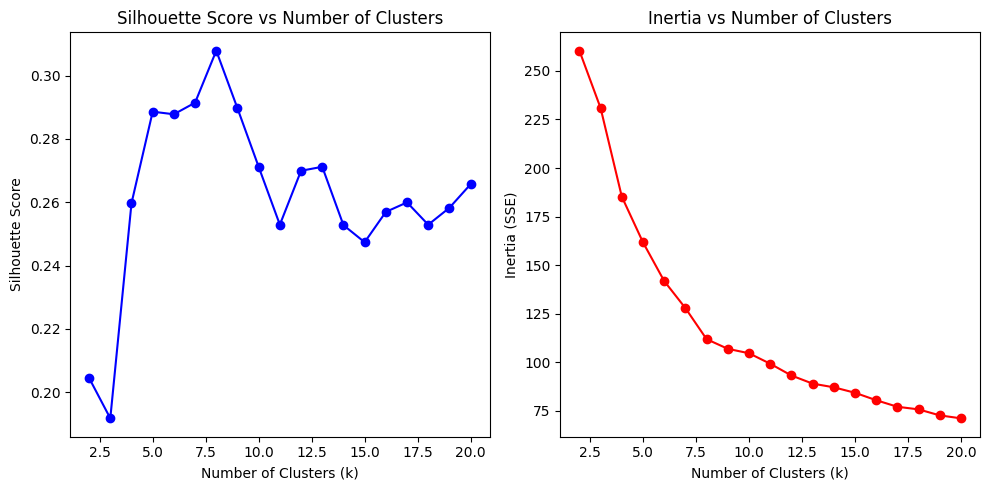

In [357]:
import numpy as np

# Get the topic distributions (topic probabilities) for each document
topic_distributions = [lda_model.get_document_topics(doc) for doc in corpus]

# Create a matrix (num_documents x num_topics)
topic_matrix = np.zeros((len(corpus), lda_model.num_topics))

# Fill the matrix with topic proportions
for i, doc_topics in enumerate(topic_distributions):
    for topic, prob in doc_topics:
        topic_matrix[i, topic] = prob

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Function to apply K-means and calculate silhouette scores
def kmeans_optimal_clusters(topic_matrix, max_k=20):
    silhouette_scores = []
    inertias = []

    # Loop through different values of k (number of clusters)
    for k in range(2, max_k + 1):  # Start from 2 clusters to avoid single cluster case
        kmeans = KMeans(n_clusters=k, random_state=100)
        kmeans.fit(topic_matrix)

        # Calculate silhouette score and inertia (within-cluster sum of squares)
        silhouette = silhouette_score(topic_matrix, kmeans.labels_)
        inertia = kmeans.inertia_

        silhouette_scores.append(silhouette)
        inertias.append(inertia)

    return silhouette_scores, inertias

# Calculate silhouette scores and inertia for different values of k
sil_scores, inertias = kmeans_optimal_clusters(topic_matrix, max_k=20)

# Plot the silhouette scores to find the optimal number of clusters (k)
plt.figure(figsize=(10, 5))

# Plot silhouette scores
plt.subplot(1, 2, 1)
plt.plot(range(2, 21), sil_scores, marker='o', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

# Plot inertia (within-cluster sum of squares) to check for the elbow point
plt.subplot(1, 2, 2)
plt.plot(range(2, 21), inertias, marker='o', color='r')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Inertia vs Number of Clusters")

plt.tight_layout()
plt.show()


In [358]:
# Suppose optimal_k is found from the silhouette score or elbow method
optimal_k = 8  # Example, use the optimal value based on your evaluation

# Fit K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=100)
kmeans.fit(topic_matrix)

# Get the cluster labels for each document
document_clusters = kmeans.labels_

# Now document_clusters will tell you which cluster each document belongs to
# For example, you can check the cluster for the first 10 documents:
print(document_clusters[:10])

# Optionally, assign the cluster labels back to your DataFrame (if using one)
import pandas as pd

# Assuming you have a DataFrame named df that contains the documents
cc_lda['Topic Cluster'] = document_clusters


[1 0 6 6 1 1 1 3 6 1]


In [359]:
cc_lda.head()

,ANZSCO Title,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,Anchor Value Merged,ANZSCO Description,Dominant Topic,Topic Cluster
0,Aboriginal and Torres Strait Islander Educatio...,ANZSCO 6,422111,NaN,build and maintain an effective online profile...,Assists Aboriginal and Torres Strait Islander ...,16,1
1,Aboriginal and Torres Strait Islander Health W...,ANZSCO 6,411511,NaN,use software on a portable device to document ...,"Liaises with patients, clients, visitors to ho...",7,0
2,Accountant (General),ANZSCO 6,221111,NaN,write software for keeping track of items in a...,Provides services relating to compliance-based...,6,6
3,Accountants,ANZSCO 4,2211,NaN,write software for keeping track of items in a...,Accountants provide services relating to finan...,6,6
4,Accounting Clerks,ANZSCO 4,5511,NaN,use software on a portable device to document ...,Accounting Clerks monitor creditor and debtor ...,16,1


In [360]:
filtered_data = cc_lda[cc_lda['ANZSCO Title'].isin(['Data Analyst', 'Data Scientist', 'Database Administrator'])]

# Display the relevant columns for these specific rows

print(filtered_data[['ANZSCO Title', 'Dominant Topic', 'Topic Cluster']].head(30))


               ANZSCO Title  Dominant Topic  Topic Cluster
241            Data Analyst              17              3
243          Data Scientist               7              0
244  Database Administrator               7              0


In [361]:
filtered_data = cc_lda[cc_lda['ANZSCO Title'].isin(['Goat Farmer', 'Deer Farmer'])]

# Display the relevant columns for these specific rows

print(filtered_data[['ANZSCO Title', 'Dominant Topic', 'Topic Cluster']].head(30))


    ANZSCO Title  Dominant Topic  Topic Cluster
249  Deer Farmer               6              6
427  Goat Farmer               6              6


In [367]:
# Filter the data for 'Data Scientist' and get its dominant topic
data_scientist_topic = cc_lda[cc_lda['ANZSCO Title'] == 'Data Scientist']['Topic Cluster'].values[0]

# Find all jobs with the same Dominant Topic as 'Data Scientist'
same_topic_jobs = cc_lda[cc_lda['Topic Cluster'] == data_scientist_topic]

# Display the relevant columns for these specific rows



In [372]:
(same_topic_jobs[['ANZSCO Title', 'Dominant Topic', 'Topic Cluster']].head(123))

,ANZSCO Title,Dominant Topic,Topic Cluster
1,Aboriginal and Torres Strait Islander Health W...,7,0
10,Advertising Manager,7,0
11,Advertising Specialist,7,0
12,Advertising and Marketing Professionals,7,0
18,Agricultural Engineer,7,0
...,...,...,...
1044,Urban and Regional Planners,7,0
1047,Valuer,6,0
1048,Vascular Surgeon,7,0
1084,Welfare Worker,7,0


In [373]:
# Export same_topic_jobs to an Excel file
same_topic_jobs[['ANZSCO Title', 'Dominant Topic', 'Topic Cluster']].to_excel('same_topic_jobs.xlsx', index=False)


#####TFIDF

Topics:
Topic: 0 
Words: 0.008*"developing" + 0.008*"research" + 0.007*"job" + 0.006*"event" + 0.006*"sport" + 0.006*"memo" + 0.006*"instruction" + 0.006*"safely" + 0.006*"machinery" + 0.006*"operate"

Topic: 1 
Words: 0.013*"developing" + 0.012*"research" + 0.009*"document" + 0.008*"security" + 0.008*"date" + 0.008*"classification" + 0.008*"type" + 0.008*"filing" + 0.008*"subject" + 0.008*"instruction"

Topic: 2 
Words: 0.010*"sport" + 0.010*"event" + 0.007*"technique" + 0.007*"diverse" + 0.007*"managing" + 0.006*"checking" + 0.006*"measurement" + 0.006*"portable" + 0.006*"uploading" + 0.006*"building"

Topic: 3 
Words: 0.009*"developing" + 0.009*"research" + 0.007*"job" + 0.006*"memo" + 0.006*"sport" + 0.006*"event" + 0.006*"machinery" + 0.006*"operate" + 0.006*"safely" + 0.006*"way"

Topic: 4 
Words: 0.009*"developing" + 0.009*"research" + 0.007*"job" + 0.007*"event" + 0.007*"sport" + 0.006*"detailed" + 0.006*"managing" + 0.005*"construction" + 0.005*"instruction" + 0.005*"impact"



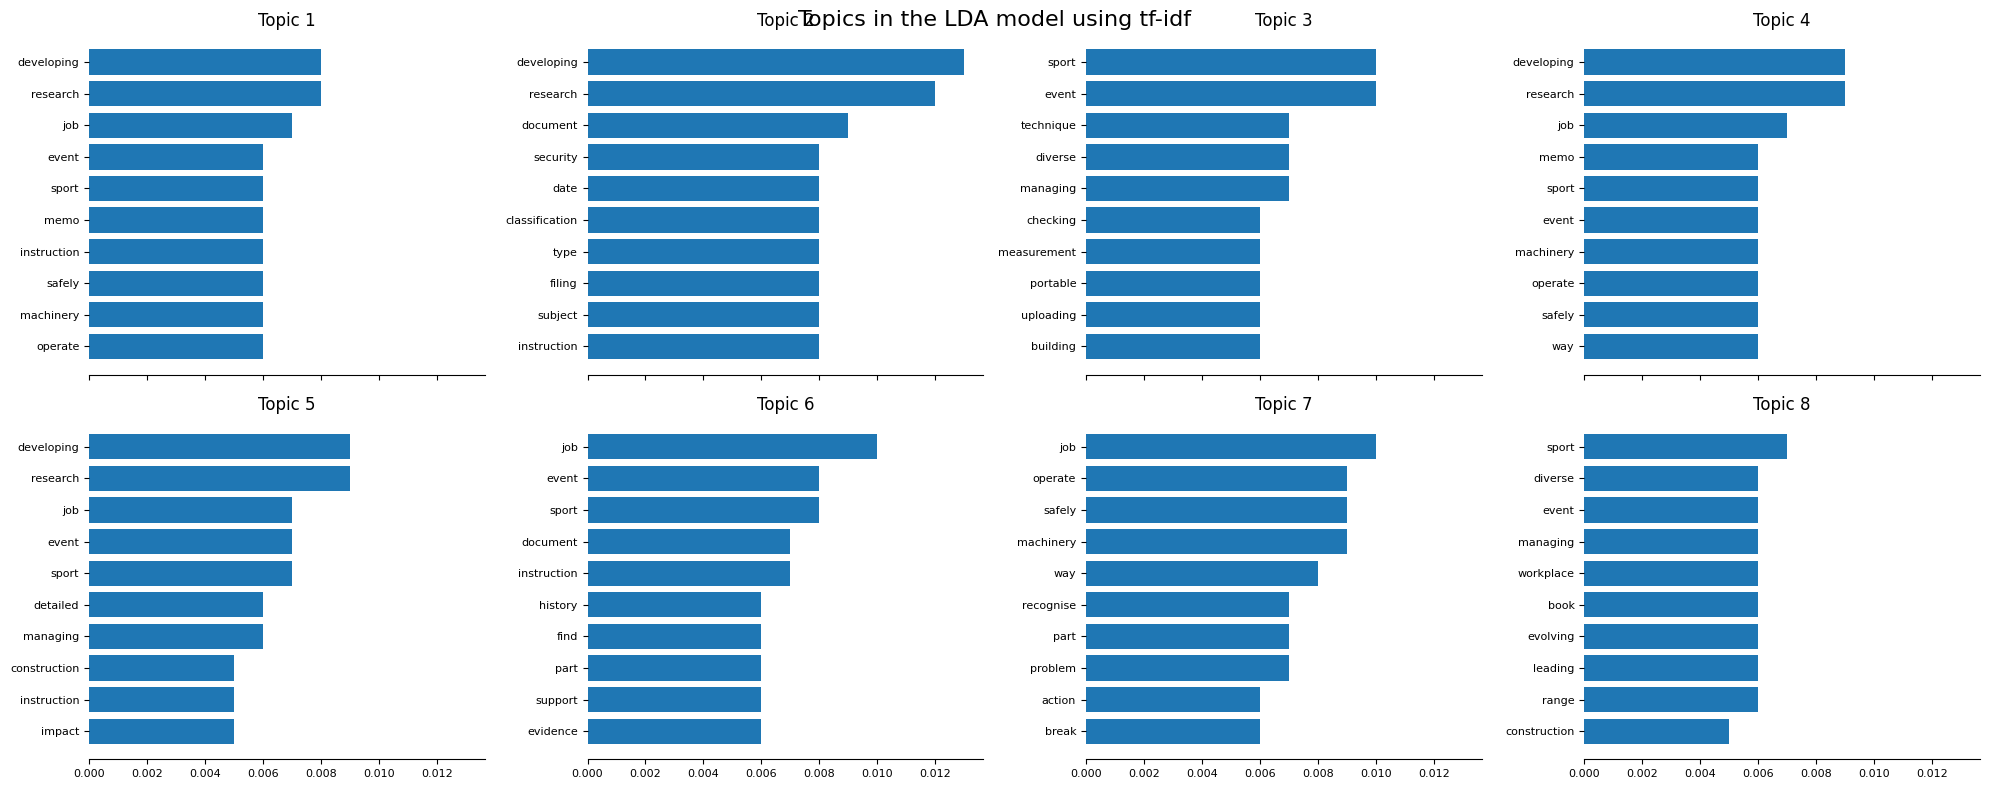

      Dominant_Topic  Perc_Contribution  \
0                  2             0.4611   
1                  2             0.8980   
2                  2             0.8957   
3                  2             0.8957   
4                  1             0.9000   
...              ...                ...   
1096               5             0.8991   
1097               2             0.9039   
1098               6             0.8864   
1099               2             0.9032   
1100               4             0.8978   

                                         Topic_Keywords  index  \
0     sport, event, technique, diverse, managing, ch...      0   
1     sport, event, technique, diverse, managing, ch...      1   
2     sport, event, technique, diverse, managing, ch...      2   
3     sport, event, technique, diverse, managing, ch...      3   
4     developing, research, document, security, date...      4   
...                                                 ...    ...   
1096  job, event, spo

In [383]:
from gensim.models import LdaMulticore
from gensim.models import TfidfModel
import matplotlib.pyplot as plt
import math

# Create TF-IDF model using the same pre-processed corpus
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Train the LDA model
num_topics = 8
lda_model = LdaMulticore(corpus=corpus_tfidf, id2word=dictionary, num_topics=8, random_state=42)

# Print the topics
print("Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

# Visualize the topics in bar plots
def plot_top_words(model, feature_names, n_top_words, title):
    # Get the number of topics
    num_topics = len(model.print_topics(-1))

    # Calculate the number of rows and columns for subplots
    num_cols = min(4, num_topics)  # Maximum 4 columns
    num_rows = math.ceil(num_topics / num_cols)

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 4*num_rows), sharex=True)
    axes = axes.flatten() if num_topics > 1 else [axes]

    for topic_idx, topic in model.print_topics(-1):
        # Use regex to extract words and weights
        words_weights = re.findall(r'(0\.\d+)\*"(.+?)"', topic)

        if words_weights:
            weights, words = zip(*words_weights)
            weights = [float(w) for w in weights]
        else:
            print(f"No matches found for topic {topic_idx}")
            continue

        ax = axes[topic_idx]
        ax.barh(words[:n_top_words], weights[:n_top_words])
        ax.set_title(f'Topic {topic_idx + 1}')
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=8)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)

    # Hide any unused subplots
    for idx in range(num_topics, len(axes)):
        axes[idx].set_visible(False)

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjust to prevent title overlap
    plt.show()

plot_top_words(lda_model, dictionary.values(), n_top_words=10, title='Topics in the LDA model using tf-idf')

# Assign topics to documents
def format_topics_sentences(ldamodel, corpus):
    topics_df = []

    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topics_df.append([int(topic_num), round(prop_topic,4), topic_keywords])
            else:
                break

    return pd.DataFrame(topics_df, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

# Use the function
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus_tfidf)

# Combine original dataframe with the topic dataframe
df_dominant_topic = pd.concat([df_topic_sents_keywords, cc_nlp_2.reset_index()], axis=1)
print(df_dominant_topic)

In [384]:
df_dominant_topic.head()

,Dominant_Topic,Perc_Contribution,Topic_Keywords,index,ANZSCO Title,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,Anchor Value Merged,ANZSCO Description
0,2,0.4611,"sport, event, technique, diverse, managing, ch...",0,Aboriginal and Torres Strait Islander Educatio...,ANZSCO 6,422111,NaN,build and maintain an effective online profile...,Assists Aboriginal and Torres Strait Islander ...
1,2,0.8980,"sport, event, technique, diverse, managing, ch...",1,Aboriginal and Torres Strait Islander Health W...,ANZSCO 6,411511,NaN,use software on a portable device to document ...,"Liaises with patients, clients, visitors to ho..."
2,2,0.8957,"sport, event, technique, diverse, managing, ch...",2,Accountant (General),ANZSCO 6,221111,NaN,write software for keeping track of items in a...,Provides services relating to compliance-based...
3,2,0.8957,"sport, event, technique, diverse, managing, ch...",3,Accountants,ANZSCO 4,2211,NaN,write software for keeping track of items in a...,Accountants provide services relating to finan...
4,1,0.9000,"developing, research, document, security, date...",4,Accounting Clerks,ANZSCO 4,5511,NaN,use software on a portable device to document ...,Accounting Clerks monitor creditor and debtor ...


In [385]:
# Filter the data for 'Data Scientist' and get its dominant topic
data_scientist_topic = df_dominant_topic[df_dominant_topic['ANZSCO Title'] == 'Data Scientist']['Dominant_Topic'].values[0]



# Find all jobs with the same Dominant Topic as 'Data Scientist'
same_topic_jobs_tf = df_dominant_topic[df_dominant_topic['Dominant_Topic'] == data_scientist_topic]

# Display the relevant columns for these specific rows



In [388]:
same_topic_jobs_tf[['ANZSCO Title', 'Dominant_Topic']].head(119)

,ANZSCO Title,Dominant_Topic
7,Actuary,4
14,Aeroplane Pilot,4
17,Agricultural Consultant,4
19,Agricultural Research Scientist,4
23,"Agricultural, Fisheries and Forestry Scientists",4
...,...,...
981,Surveyor,4
1020,Traditional Chinese Medicine Practitioner,4
1039,University Lecturers and Tutors,4
1043,Urban and Regional Planner,4


#### TT

##### EDA

In [425]:
tt_nlp = tt_merged_df.copy()

In [426]:
tt_nlp.head()

,Technology Tool Category,Technology Tool Category Description,Technology Tool,Technology Tool Description,Technology Tool Extended Description,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title_x,Emerging/Trending Flag,ANZSCO Description,Technology Tool Example Count
10475,"Project, process, and risk management systems","Systems to manage projects, risks, regulatory ...",Project management software,"Software for planning, documenting, and managi...",Project management software incorporates softw...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...,10.0
2017,Data analysis and reporting platforms,Software for data analysis and produce electro...,Statistical and data analysis software,Software used to support the process of analys...,Statistical and data analysis software encompa...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...,58.0
9153,Payroll and human resource management platforms,Systems to undertake human resource management...,Human resources software,Software and systems used to manage employee a...,Human resources software encompasses software ...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...,5.0
447,Communication technologies,"Data, voice and/or video communication platforms",Audio/video conferencing software,Software for collaboration using video or audi...,Audio/video conferencing software enables peop...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...,5.0
5152,Graphic design and imagery technologies,Software for graphic design and photographic e...,Flow chart and diagram software,Software used to create 2D and 3D diagrams and...,Flow chart and diagram software incorporates s...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...,5.0


In [427]:
tt_nlp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12910 entries, 10475 to 8650
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Technology Tool Category              12910 non-null  object 
 1   Technology Tool Category Description  12910 non-null  object 
 2   Technology Tool                       12910 non-null  object 
 3   Technology Tool Description           12910 non-null  object 
 4   Technology Tool Extended Description  12910 non-null  object 
 5   Occupation Type_x                     12910 non-null  object 
 6   ANZSCO Code                           12910 non-null  int64  
 7   Sub-Profile Code_x                    7543 non-null   object 
 8   ANZSCO Title_x                        12910 non-null  object 
 9   Emerging/Trending Flag                556 non-null    object 
 10  ANZSCO Description                    12905 non-null  object 
 11  Technology Tool E

<ipython-input-428-8cd8c493c780>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ANZSCO Title_x', y='Technology Tool Example Count', data=anzsco_grouped_sorted.head(10), palette='viridis')


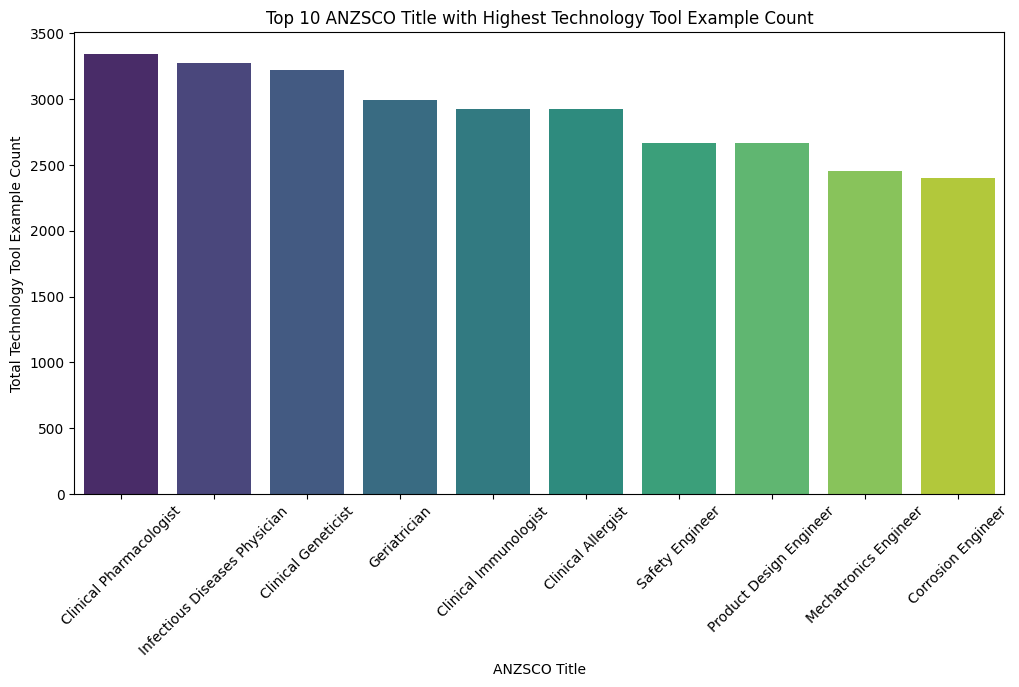

In [428]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group by 'ANZSCO Code' and sum the 'Technology Tool Example Count'
anzsco_grouped = tt_nlp.groupby('ANZSCO Title_x')['Technology Tool Example Count'].sum().reset_index()

# Step 2: Sort the results to find the ANZSCO Code with the highest count
anzsco_grouped_sorted = anzsco_grouped.sort_values(by='Technology Tool Example Count', ascending=False)

# Step 3: Plot the ANZSCO Code with the highest Technology Tool Example Count
plt.figure(figsize=(12, 6))
sns.barplot(x='ANZSCO Title_x', y='Technology Tool Example Count', data=anzsco_grouped_sorted.head(10), palette='viridis')
plt.title('Top 10 ANZSCO Title with Highest Technology Tool Example Count')
plt.xlabel('ANZSCO Title')
plt.ylabel('Total Technology Tool Example Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-429-5b79bd1abf8a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ANZSCO Title_x', y='Technology Tool Example Count', data=anzsco_grouped_sorted.head(10), palette='viridis')


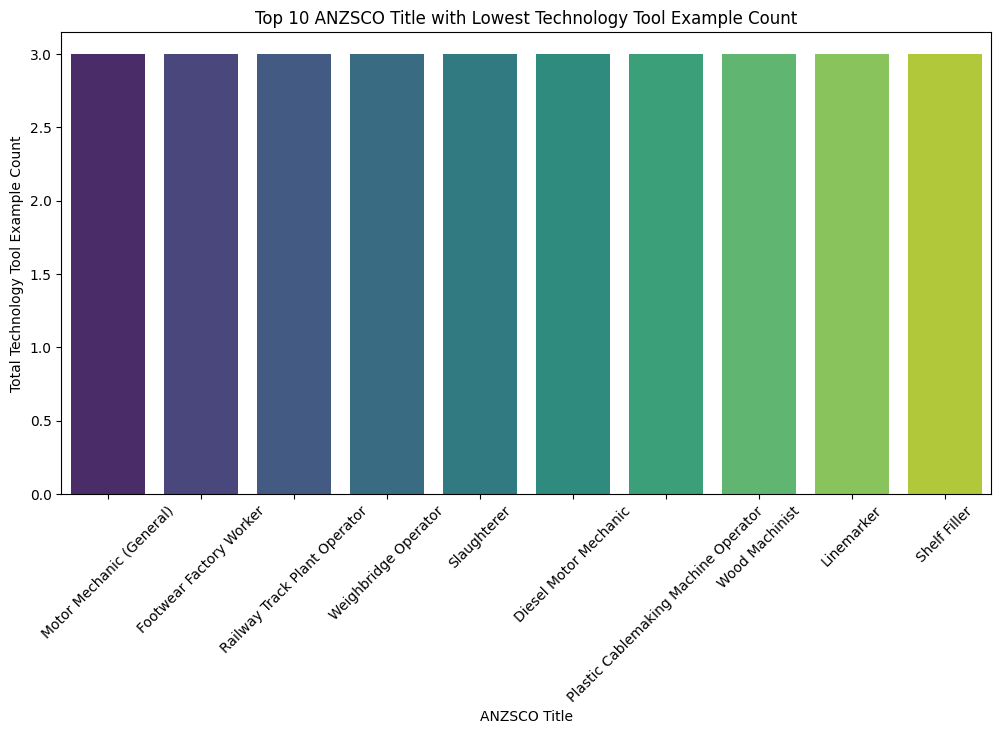

In [429]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group by 'ANZSCO Code' and sum the 'Technology Tool Example Count'
anzsco_grouped = tt_nlp.groupby('ANZSCO Title_x')['Technology Tool Example Count'].sum().reset_index()

# Step 2: Sort the results to find the ANZSCO Code with the highest count
anzsco_grouped_sorted = anzsco_grouped.sort_values(by='Technology Tool Example Count', ascending=True)

# Step 3: Plot the ANZSCO Code with the highest Technology Tool Example Count
plt.figure(figsize=(12, 6))
sns.barplot(x='ANZSCO Title_x', y='Technology Tool Example Count', data=anzsco_grouped_sorted.head(10), palette='viridis')
plt.title('Top 10 ANZSCO Title with Lowest Technology Tool Example Count')
plt.xlabel('ANZSCO Title')
plt.ylabel('Total Technology Tool Example Count')
plt.xticks(rotation=45)
plt.show()


In [430]:
import pandas as pd

# Assuming your DataFrame is named tt_nlp
# Group by 'ANZSCO Title' and aggregate the other columns
tt_nlp_aggregated = tt_nlp.groupby('ANZSCO Title_x').agg(
    {
        'Occupation Type_x': 'first',                         # Keep the first value of 'Occupation Type_x'
        'ANZSCO Code': 'first',                               # Keep the first value of 'ANZSCO Code'
        'Sub-Profile Code_x': 'first',                         # Keep the first value of 'Sub-Profile Code_x'
        'Technology Tool Category': ' '.join,                 # Merge the 'Technology Tool Category' into a single string
        'Technology Tool Category Description': ' '.join,     # Merge 'Technology Tool Category Description'
        'Technology Tool': ' '.join,                          # Merge the 'Technology Tool' values
        'Technology Tool Description': ' '.join,              # Merge the 'Technology Tool Description' values
        'Technology Tool Extended Description': ' '.join,     # Merge the 'Technology Tool Extended Description'
        'Emerging/Trending Flag': 'first',                     # Keep the first value of 'Emerging/Trending Flag'
        'ANZSCO Description': 'first',                         # Keep the first value of 'ANZSCO Description'
        'Technology Tool Example Count': 'sum'                # Sum the 'Technology Tool Example Count'
    }
).reset_index()

# Rename 'Anchor Value' column to 'Anchor Value Merged' if necessary (but 'Anchor Value' is not mentioned in your provided columns)
# tt_nlp_aggregated.rename(columns={'Anchor Value': 'Anchor Value Merged'}, inplace=True)

# Print the new aggregated DataFrame
print(tt_nlp_aggregated.head())


                                      ANZSCO Title_x        Occupation Type_x  \
0                                      Abalone Diver           Specialisation   
1                                   Abattoir Manager  NEC Category Occupation   
2                       Aboriginal Education Teacher  NEC Category Occupation   
3                            Aboriginal Health Nurse  NEC Category Occupation   
4  Aboriginal and Torres Strait Islander Educatio...                 ANZSCO 6   

   ANZSCO Code Sub-Profile Code_x  \
0       399911                S01   
1       149999                N01   
2       241599                N01   
3       254499                N08   
4       422111               None   

                            Technology Tool Category  \
0  Geographical guidance and navigation technolog...   
1  Payroll and human resource management platform...   
2  Education and student management platforms Edu...   
3  Physical examination, therapy and treatment te...   
4  Graphic

In [431]:
import pandas as pd
import re
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Assuming 'tt_nlp' is your DataFrame, and 'Technology Tool Extended Description' column contains the text you want to clean

# Step 1: Pre-process the text before tokenization
def clean_text(text):
    # Remove extra spaces, symbols, and digits
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and symbols
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower().strip()  # Convert to lowercase and remove leading/trailing whitespaces
    return text

# Apply the text cleaning function to 'Technology Tool Extended Description' column
tt_nlp_aggregated['Technology Tool Extended Description'] = tt_nlp_aggregated['Technology Tool Extended Description'].apply(clean_text)
tt_nlp_aggregated['Technology Tool Description'] = tt_nlp_aggregated['Technology Tool Description'].apply(clean_text)



# Check the changes in the DataFrame
print(tt_nlp_aggregated[['Technology Tool Extended Description']].head())
print(tt_nlp_aggregated[['Technology Tool Description']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                Technology Tool Extended Description
0  aviation and marine communication systems enco...
1  human resources software encompasses software ...
2  student and learning management systems encomp...
3  medical examination measurement and monitoring...
4  graphics or photo imaging software encompasses...
                         Technology Tool Description
0  radio and communications apparatus that enable...
1  software and systems used to manage employee a...
2  software used to manage the delivery and admin...
3  medical apparatus that supports the clinical e...
4  software used to produce edit and manipulate d...


In [432]:
tt_nlp_aggregated.head(20)

,ANZSCO Title_x,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,Technology Tool Category,Technology Tool Category Description,Technology Tool,Technology Tool Description,Technology Tool Extended Description,Emerging/Trending Flag,ANZSCO Description,Technology Tool Example Count
0,Abalone Diver,Specialisation,399911,S01,Geographical guidance and navigation technolog...,"Systems for real-time navigation, mapping and ...",Aviation and marine communication systems Avia...,radio and communications apparatus that enable...,aviation and marine communication systems enco...,None,Swims underwater to undertake tasks such as se...,60.0
1,Abattoir Manager,NEC Category Occupation,149999,N01,Payroll and human resource management platform...,Systems to undertake human resource management...,Human resources software Human resources softw...,software and systems used to manage employee a...,human resources software encompasses software ...,None,"Plan, direct, or coordinate marina activities ...",192.0
2,Aboriginal Education Teacher,NEC Category Occupation,241599,N01,Education and student management platforms Edu...,Systems for managing student records and educa...,Student and learning management systems Studen...,software used to manage the delivery and admin...,student and learning management systems encomp...,None,This occupation group covers Special Education...,100.0
3,Aboriginal Health Nurse,NEC Category Occupation,254499,N08,"Physical examination, therapy and treatment te...",Medical instruments and technologies for treat...,"Medical examination, measurement, and monitori...",medical apparatus that supports the clinical e...,medical examination measurement and monitoring...,None,"Assess patient health problems and needs, deve...",117.0
4,Aboriginal and Torres Strait Islander Educatio...,ANZSCO 6,422111,None,Graphic design and imagery technologies Commun...,Software for graphic design and photographic e...,Graphics or photo imaging software Audio/video...,software used to produce edit and manipulate d...,graphics or photo imaging software encompasses...,None,Support Aboriginal and Torres Strait Islander ...,30.0
5,Aboriginal and Torres Strait Islander Health W...,ANZSCO 6,411511,None,Digital health records and patient management ...,Systems for managing health records and medica...,Patient management systems and electronic heal...,software that applies codes and classification...,patient management systems and electronics hea...,None,"Liaises with patients, clients, visitors to ho...",10.0
6,Accountant (General),ANZSCO 6,221111,None,Financial management and service delivery plat...,Systems to undertake financial management and ...,Accounting and financial management systems Ac...,software for managing accounts inventory and f...,accounting and financial management systems en...,Trending,Administers insolvency procedures. Licencing o...,282.0
7,Accountants,ANZSCO 4,2211,None,Financial management and service delivery plat...,Systems to undertake financial management and ...,Accounting and financial management systems Fi...,software for managing accounts inventory and f...,accounting and financial management systems en...,Trending,Accountants provide services relating to finan...,26.0
8,Accounting Clerks,ANZSCO 4,5511,None,Customer management and engagement platforms D...,Software that provides customer management and...,Customer relationship management (CRM) softwar...,software used to track and record customer dat...,customer relationship management crm software ...,None,Accounting Clerks monitor creditor and debtor ...,20.0
9,Accounting Practice Manager,NEC Category Occupation,512299,N01,Data analysis and reporting platforms Data ana...,Software for data analysis and produce electro...,Business intelligence and decision support sof...,software for gathering storage analysis and re...,business intelligence and decision support sof...,None,This occupation group covers Practice Managers...,205.0


In [433]:
from nltk.tokenize import word_tokenize
import nltk

# Ensure that the necessary NLTK data is downloaded
nltk.download('punkt')

# Step 1: Tokenize the text in the 'Anchor Value' column
w_stopword_ext_tt = tt_nlp_aggregated['Technology Tool Extended Description'].apply(word_tokenize)
w_stopword_desc_tt = tt_nlp_aggregated['Technology Tool Description'].apply(word_tokenize)

# Step 2: Check the changes in the DataFrame
tt_nlp_aggregated.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ANZSCO Title_x,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,Technology Tool Category,Technology Tool Category Description,Technology Tool,Technology Tool Description,Technology Tool Extended Description,Emerging/Trending Flag,ANZSCO Description,Technology Tool Example Count
0,Abalone Diver,Specialisation,399911,S01,Geographical guidance and navigation technolog...,"Systems for real-time navigation, mapping and ...",Aviation and marine communication systems Avia...,radio and communications apparatus that enable...,aviation and marine communication systems enco...,None,Swims underwater to undertake tasks such as se...,60.0
1,Abattoir Manager,NEC Category Occupation,149999,N01,Payroll and human resource management platform...,Systems to undertake human resource management...,Human resources software Human resources softw...,software and systems used to manage employee a...,human resources software encompasses software ...,None,"Plan, direct, or coordinate marina activities ...",192.0
2,Aboriginal Education Teacher,NEC Category Occupation,241599,N01,Education and student management platforms Edu...,Systems for managing student records and educa...,Student and learning management systems Studen...,software used to manage the delivery and admin...,student and learning management systems encomp...,None,This occupation group covers Special Education...,100.0
3,Aboriginal Health Nurse,NEC Category Occupation,254499,N08,"Physical examination, therapy and treatment te...",Medical instruments and technologies for treat...,"Medical examination, measurement, and monitori...",medical apparatus that supports the clinical e...,medical examination measurement and monitoring...,None,"Assess patient health problems and needs, deve...",117.0
4,Aboriginal and Torres Strait Islander Educatio...,ANZSCO 6,422111,None,Graphic design and imagery technologies Commun...,Software for graphic design and photographic e...,Graphics or photo imaging software Audio/video...,software used to produce edit and manipulate d...,graphics or photo imaging software encompasses...,None,Support Aboriginal and Torres Strait Islander ...,30.0


In [435]:
import pandas as pd

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Perform lemmatization on tokenized words
lemmatized_stop_ext = w_stopword_ext_tt.apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
lemmatized_stop_desc =w_stopword_desc_tt.apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
# Print sample output
print(lemmatized_stop_ext.head())
print(lemmatized_stop_desc.head())




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [aviation, and, marine, communication, system,...
1    [human, resource, software, encompasses, softw...
2    [student, and, learning, management, system, e...
3    [medical, examination, measurement, and, monit...
4    [graphic, or, photo, imaging, software, encomp...
Name: Technology Tool Extended Description, dtype: object
0    [radio, and, communication, apparatus, that, e...
1    [software, and, system, used, to, manage, empl...
2    [software, used, to, manage, the, delivery, an...
3    [medical, apparatus, that, support, the, clini...
4    [software, used, to, produce, edit, and, manip...
Name: Technology Tool Description, dtype: object


In [436]:
from nltk.corpus import stopwords

# Ensure necessary NLTK data is downloaded
nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from lemmatized_stop_values
lemmatized_clean_ext = lemmatized_stop_ext.apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

lemmatized_clean_desc = lemmatized_stop_desc.apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

# Print sample output of lemmatized_clean_values
print(lemmatized_clean_ext.head())
print(lemmatized_clean_desc.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [aviation, marine, communication, system, enco...
1    [human, resource, software, encompasses, softw...
2    [student, learning, management, system, encomp...
3    [medical, examination, measurement, monitoring...
4    [graphic, photo, imaging, software, encompasse...
Name: Technology Tool Extended Description, dtype: object
0    [radio, communication, apparatus, enables, com...
1    [software, system, used, manage, employee, hum...
2    [software, used, manage, delivery, administrat...
3    [medical, apparatus, support, clinical, examin...
4    [software, used, produce, edit, manipulate, di...
Name: Technology Tool Description, dtype: object



🔹 Top 20 Bigrams:
encompasses software: 5190
software encompasses: 4979
technology tool: 4714
management system: 3883
management software: 3523
data analysis: 3081
tool may: 3008
software system: 2521
statistical data: 2487
may interlink: 2338
software toolsets: 2068
business intelligence: 1913
intelligence decision: 1913
decision support: 1913
software may: 1858
system support: 1843
analysis software: 1828
editing software: 1721
creation editing: 1629
software incorporates: 1620

🔹 Top 20 Trigrams:
software encompasses software: 4031
statistical data analysis: 2487
technology tool may: 2423
encompasses software system: 2292
encompasses software toolsets: 2068
business intelligence decision: 1913
intelligence decision support: 1913
data analysis software: 1669
creation editing software: 1409
project management software: 1400
industrial control automation: 1304
control automation software: 1304
software incorporates software: 1265
incorporates software package: 1265
decision support so

<ipython-input-447-3b2da7f7fa4b>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


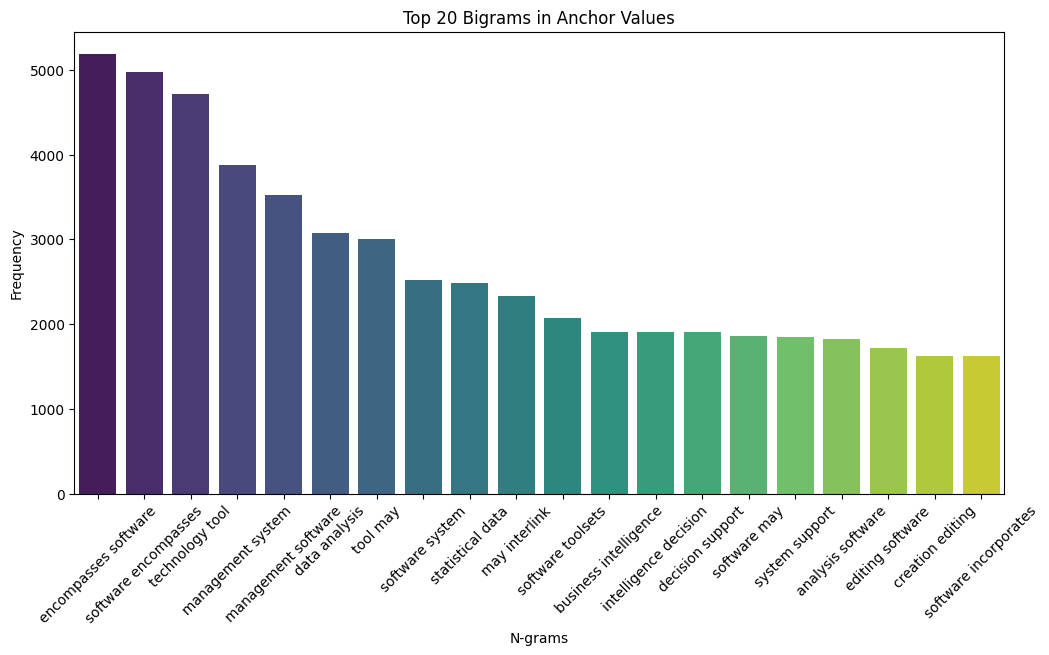

<ipython-input-447-3b2da7f7fa4b>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


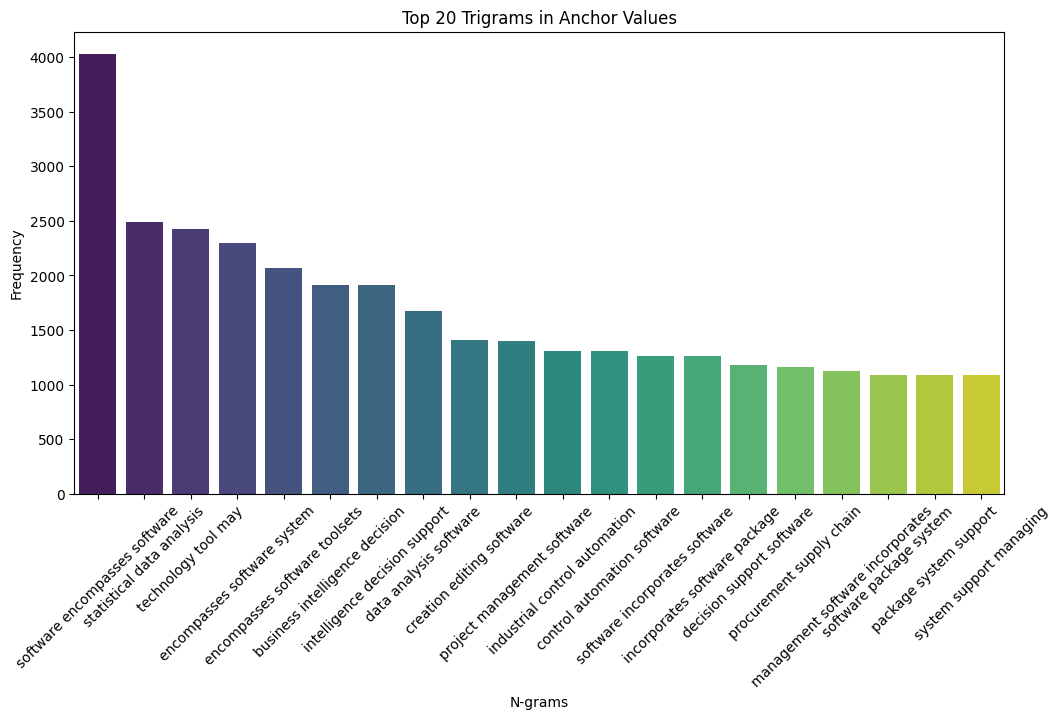

In [447]:
from nltk.util import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a single flattened list of words after removing stopwords
filtered_words_flat = [word for words in lemmatized_clean_ext for word in words]

# Generate bigrams and trigrams
bigrams = list(ngrams(filtered_words_flat, 2))
trigrams = list(ngrams(filtered_words_flat, 3))

# Count frequency of bigrams and trigrams
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Get the top 20 most common bigrams and trigrams
top_20_bigrams = bigram_freq.most_common(20)
top_20_trigrams = trigram_freq.most_common(20)

# Display the top 20 bigrams and trigrams with counts
print("\n🔹 Top 20 Bigrams:")
for bigram, count in top_20_bigrams:
    print(f"{' '.join(bigram)}: {count}")

print("\n🔹 Top 20 Trigrams:")
for trigram, count in top_20_trigrams:
    print(f"{' '.join(trigram)}: {count}")

# Function to plot bigrams/trigrams
def plot_ngrams(ngrams_list, title):
    ngram_labels, ngram_counts = zip(*ngrams_list)
    ngram_labels = [' '.join(ngram) for ngram in ngram_labels]  # Convert tuples to strings

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

# Plot Bigrams
plot_ngrams(top_20_bigrams, "Top 20 Bigrams in Anchor Values")

# Plot Trigrams
plot_ngrams(top_20_trigrams, "Top 20 Trigrams in Anchor Values")



🔹 Top 20 Bigrams:
software used: 4356
used create: 1852
software planning: 1085
planning documenting: 1085
documenting managing: 1085
managing project: 1085
project including: 1085
including managing: 1085
managing milestone: 1085
milestone task: 1085
task scheduling: 1085
scheduling budgeting: 1085
budgeting software: 972
used manage: 874
patient software: 682
used support: 675
software gathering: 674
gathering storage: 674
storage analysis: 674
analysis reporting: 674

🔹 Top 20 Trigrams:
software used create: 1176
software planning documenting: 1085
planning documenting managing: 1085
documenting managing project: 1085
managing project including: 1085
project including managing: 1085
including managing milestone: 1085
managing milestone task: 1085
milestone task scheduling: 1085
task scheduling budgeting: 1085
scheduling budgeting software: 972
software gathering storage: 674
gathering storage analysis: 674
storage analysis reporting: 674
analysis reporting data: 674
reporting data 

<ipython-input-449-56e984490f63>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


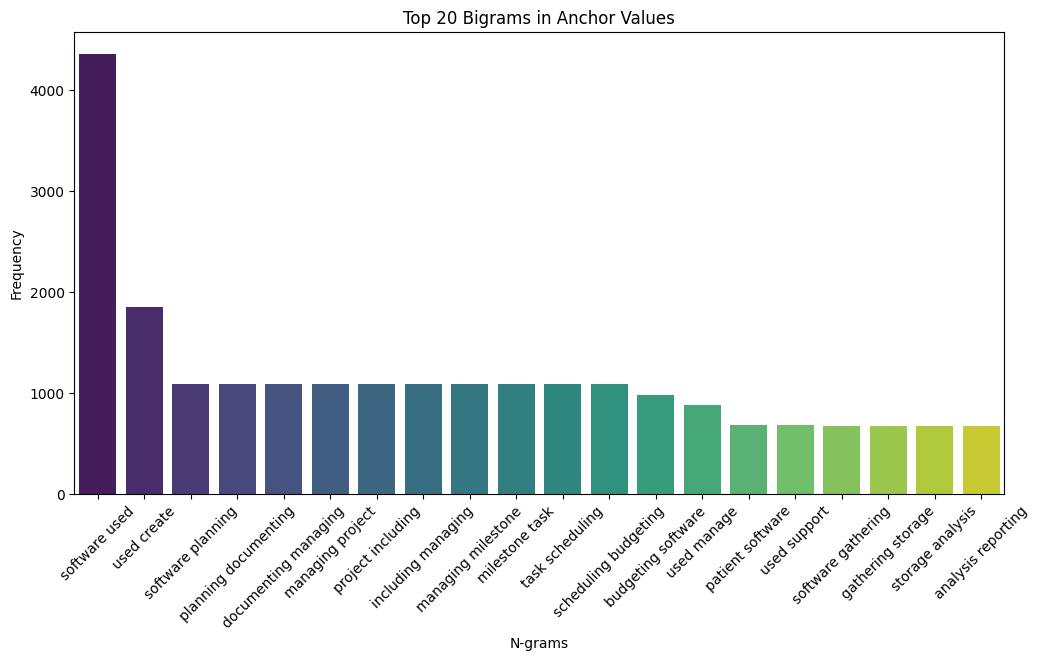

<ipython-input-449-56e984490f63>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


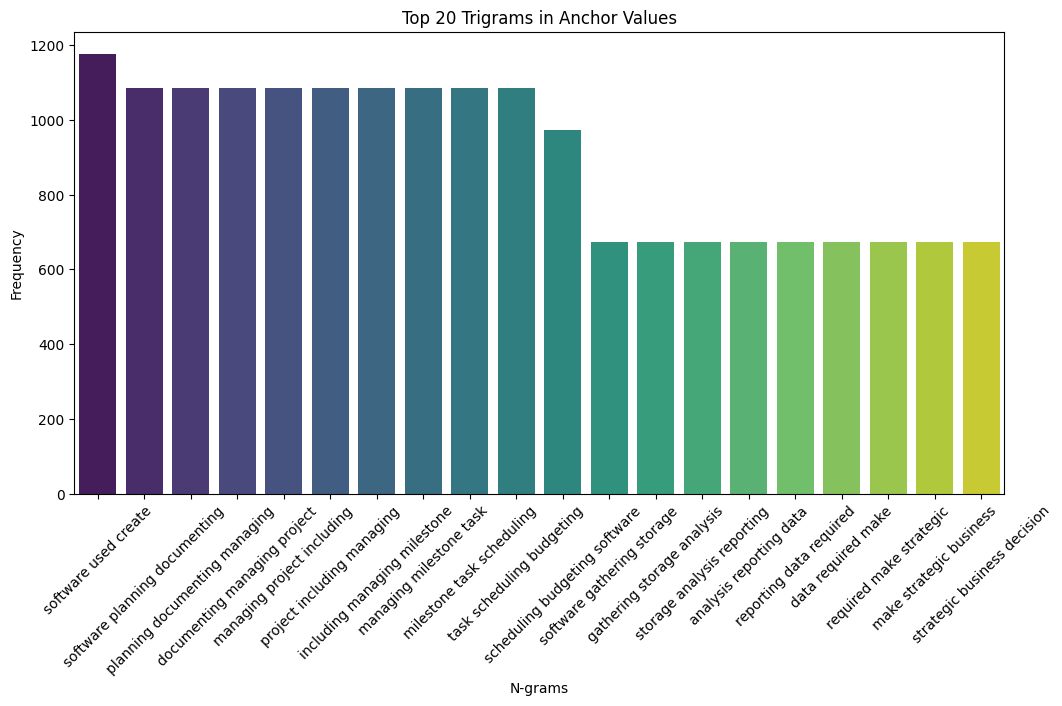

In [449]:
from nltk.util import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a single flattened list of words after removing stopwords
filtered_words_flat_desc = [word for words in lemmatized_clean_desc for word in words]

# Generate bigrams and trigrams
bigrams = list(ngrams(filtered_words_flat_desc, 2))
trigrams = list(ngrams(filtered_words_flat_desc, 3))

# Count frequency of bigrams and trigrams
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Get the top 20 most common bigrams and trigrams
top_20_bigrams = bigram_freq.most_common(20)
top_20_trigrams = trigram_freq.most_common(20)

# Display the top 20 bigrams and trigrams with counts
print("\n🔹 Top 20 Bigrams:")
for bigram, count in top_20_bigrams:
    print(f"{' '.join(bigram)}: {count}")

print("\n🔹 Top 20 Trigrams:")
for trigram, count in top_20_trigrams:
    print(f"{' '.join(trigram)}: {count}")

# Function to plot bigrams/trigrams
def plot_ngrams(ngrams_list, title):
    ngram_labels, ngram_counts = zip(*ngrams_list)
    ngram_labels = [' '.join(ngram) for ngram in ngram_labels]  # Convert tuples to strings

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

# Plot Bigrams
plot_ngrams(top_20_bigrams, "Top 20 Bigrams in Anchor Values")

# Plot Trigrams
plot_ngrams(top_20_trigrams, "Top 20 Trigrams in Anchor Values")


##### LDA

In [452]:
# This module implements the concept of a Dictionary
# i.e. a mapping between words and their integer ids
from gensim.corpora import Dictionary

# Create a dictionary
dictionary = Dictionary(lemmatized_clean_desc)

# Print sample mapping
keys = list(dictionary.token2id.keys())[:5]
vals = list(dictionary.token2id.values())[:5]
print("Sample dictionary mapping:")
for (key, val) in zip(keys, vals):
    print(f"{key} => {val}")

Sample dictionary mapping:
apparatus => 0
communication => 1
coordinate => 2
create => 3
crew => 4


In [456]:
# Build a corpus for the topic model

# Convert the document into a Bag-Of-Words format by producing
# a list of tuples in (token_id, token_count) format
corpus = [dictionary.doc2bow(text) for text in lemmatized_clean_desc]

# Print a sample from the created corpus
print(f"Text: {' '.join(lemmatized_clean_desc[0])}")
print(f"Corpus: {corpus[0]}")

Text: radio communication apparatus enables communication vehicle crew vehicle land crew radio communication apparatus enables communication vehicle crew vehicle land crew radio communication apparatus enables communication vehicle crew vehicle land crew radio communication apparatus enables communication vehicle crew vehicle land crew software used create edit map software used create edit map software used create edit map software used create edit map software used create edit map radio communication apparatus enables communication vehicle crew vehicle land crew device software receive provide gps coordinate interactive map visualisation device software receive provide gps coordinate interactive map visualisation device software receive provide gps coordinate interactive map visualisation device software receive provide gps coordinate interactive map visualisation device software receive provide gps coordinate interactive map visualisation
Corpus: [(0, 5), (1, 10), (2, 5), (3, 5), (4

In [457]:
# Module to train and use the Latent Dirichlet Allocation model
from gensim.models.ldamodel import LdaModel

# Initialize the model with the corpus and dictionary - this will take a while to run, be patient!
lda_model = LdaModel(
   corpus=corpus, id2word=dictionary, num_topics=20,
   random_state=100, update_every=1, chunksize=100,
   passes=10, alpha='auto', per_word_topics=True
)

#You may fine tune parameters from the documentation here: https://radimrehurek.com/gensim/models/ldamodel.html. Try them out.

In [458]:
# Save the model

lda_model.save("lda_model") # Save the model as lda_model
del lda_model # Delete the model and free up the space used by it

In [459]:
# Load the model
lda_model = LdaModel.load("lda_model") # Load it by passing the name

In [460]:
import pyLDAvis # Module for interactive topic model visualization
# Function to prepare LDA model for visualiztion
from pyLDAvis.gensim import prepare

# Enable the display of visualizations in IPython Notebooks
pyLDAvis.enable_notebook()

# Prepare and transform and LDA model
pyLDAvis_data = prepare(lda_model, corpus, dictionary)

In [461]:
pyLDAvis.display(pyLDAvis_data)

In [464]:
# Get the dominant topic for each document (row in the dataset)
dominant_topics = [max(lda_model.get_document_topics(dictionary.doc2bow(tokens)), key=lambda x: x[1])[0] for tokens in lemmatized_clean_desc]
tt_lda = tt_nlp_aggregated.copy()
# Add the dominant topic as a new column in the dataset
tt_lda['Dominant Topic'] = dominant_topics

# Filter the rows where the ANZSCO Title is 'Data Analyst' or 'Data Scientist'
filtered_data = tt_lda[tt_lda['ANZSCO Title_x'].isin(['Data Analyst', 'Data Scientist', 'Database Administrator'])]

# Display the relevant columns for these specific rows
print(filtered_data[['ANZSCO Title_x', 'Dominant Topic']].head(30))


             ANZSCO Title_x  Dominant Topic
301            Data Analyst              19
303          Data Scientist              19
304  Database Administrator              16


In [465]:
filtered_data = tt_lda[tt_lda['ANZSCO Title_x'].isin(['Deer Farmer', 'Goat Farmer'])]

# Display the relevant columns for these specific rows
print(filtered_data[['ANZSCO Title_x', 'Dominant Topic']].head(30))

    ANZSCO Title_x  Dominant Topic
311    Deer Farmer               4
516    Goat Farmer               4


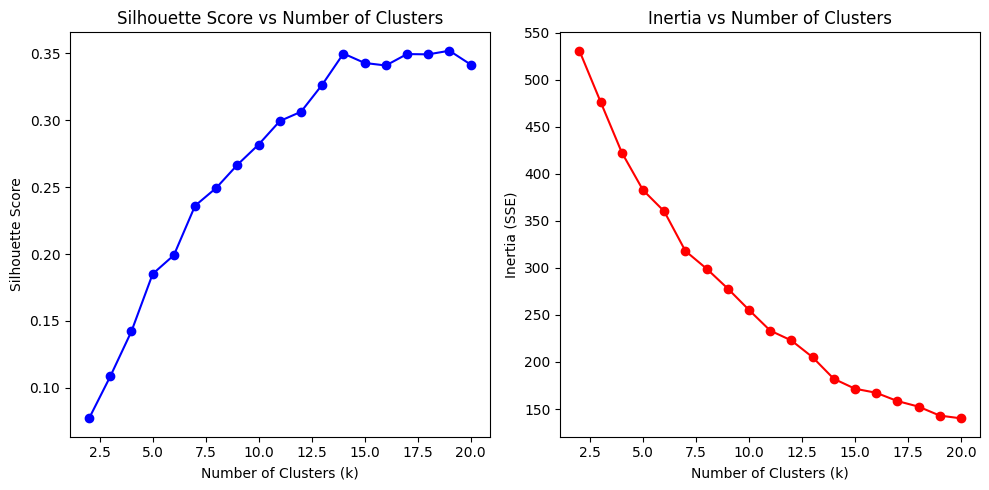

In [466]:
import numpy as np

# Get the topic distributions (topic probabilities) for each document
topic_distributions = [lda_model.get_document_topics(doc) for doc in corpus]

# Create a matrix (num_documents x num_topics)
topic_matrix = np.zeros((len(corpus), lda_model.num_topics))

# Fill the matrix with topic proportions
for i, doc_topics in enumerate(topic_distributions):
    for topic, prob in doc_topics:
        topic_matrix[i, topic] = prob

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Function to apply K-means and calculate silhouette scores
def kmeans_optimal_clusters(topic_matrix, max_k=20):
    silhouette_scores = []
    inertias = []

    # Loop through different values of k (number of clusters)
    for k in range(2, max_k + 1):  # Start from 2 clusters to avoid single cluster case
        kmeans = KMeans(n_clusters=k, random_state=100)
        kmeans.fit(topic_matrix)

        # Calculate silhouette score and inertia (within-cluster sum of squares)
        silhouette = silhouette_score(topic_matrix, kmeans.labels_)
        inertia = kmeans.inertia_

        silhouette_scores.append(silhouette)
        inertias.append(inertia)

    return silhouette_scores, inertias

# Calculate silhouette scores and inertia for different values of k
sil_scores, inertias = kmeans_optimal_clusters(topic_matrix, max_k=20)

# Plot the silhouette scores to find the optimal number of clusters (k)
plt.figure(figsize=(10, 5))

# Plot silhouette scores
plt.subplot(1, 2, 1)
plt.plot(range(2, 21), sil_scores, marker='o', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

# Plot inertia (within-cluster sum of squares) to check for the elbow point
plt.subplot(1, 2, 2)
plt.plot(range(2, 21), inertias, marker='o', color='r')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Inertia vs Number of Clusters")

plt.tight_layout()
plt.show()


In [467]:
# Suppose optimal_k is found from the silhouette score or elbow method
optimal_k = 13  # Example, use the optimal value based on your evaluation

# Fit K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=100)
kmeans.fit(topic_matrix)

# Get the cluster labels for each document
document_clusters = kmeans.labels_

# Now document_clusters will tell you which cluster each document belongs to
# For example, you can check the cluster for the first 10 documents:
print(document_clusters[:10])

# Optionally, assign the cluster labels back to your DataFrame (if using one)
import pandas as pd

# Assuming you have a DataFrame named df that contains the documents
tt_lda['Topic Cluster'] = document_clusters


[ 7  2  3  5  3  1 12 12 12 12]


In [468]:
filtered_data = tt_lda[tt_lda['ANZSCO Title_x'].isin(['Data Analyst', 'Data Scientist', 'Database Administrator'])]

# Display the relevant columns for these specific rows

print(filtered_data[['ANZSCO Title_x', 'Dominant Topic', 'Topic Cluster']].head(30))


             ANZSCO Title_x  Dominant Topic  Topic Cluster
301            Data Analyst              19              0
303          Data Scientist              19              0
304  Database Administrator              16              4


In [470]:
# Filter the data for 'Data Scientist' and get its dominant topic
data_scientist_topic = tt_lda[tt_lda['ANZSCO Title_x'] == 'Data Scientist']['Topic Cluster'].values[0]

# Find all jobs with the same Dominant Topic as 'Data Scientist'
same_topic_jobs = tt_lda[tt_lda['Topic Cluster'] == data_scientist_topic]

# Display the relevant columns for these specific rows
# Export same_topic_jobs to an Excel file
same_topic_jobs[['ANZSCO Title_x', 'Dominant Topic', 'Topic Cluster']].to_excel('same_topic_jobs.xlsx', index=False)



##### TFIDF LDA

In [437]:
# This module implements the concept of a Dictionary
# i.e. a mapping between words and their integer ids
from gensim.corpora import Dictionary

# Create a dictionary
dictionary = Dictionary(lemmatized_clean_desc)

# Print sample mapping
keys = list(dictionary.token2id.keys())[:5]
vals = list(dictionary.token2id.values())[:5]
print("Sample dictionary mapping:")
for (key, val) in zip(keys, vals):
    print(f"{key} => {val}")

Sample dictionary mapping:
apparatus => 0
communication => 1
coordinate => 2
create => 3
crew => 4


In [438]:
# Build a corpus for the topic model

# Convert the document into a Bag-Of-Words format by producing
# a list of tuples in (token_id, token_count) format
corpus = [dictionary.doc2bow(text) for text in lemmatized_clean_desc]

# Print a sample from the created corpus
print(f"Text: {' '.join(filtered_words[0])}")
print(f"Corpus: {corpus[0]}")

Text: build maintain effective online profile career management negotiate price sale term prepare contract house learn new filing system group document type security classification subject date use blood pressure machine accurately record result participate work meeting ask appropriate follow question develop program multiple live musical performance special event sport carnival throughout year sport club venue coordinate volunteer staff contractor deliver event find evidence support history essay rare document read interpret instruction technical drawing equipment instruction manual work range subject matter expert diverse perspective achieve challenging goal write memo staff outlining new directive
Corpus: [(0, 5), (1, 10), (2, 5), (3, 5), (4, 10), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5), (10, 5), (11, 10), (12, 5), (13, 5), (14, 5), (15, 10), (16, 5), (17, 10), (18, 5)]


Topics:
Topic: 0 
Words: 0.016*"medical" + 0.014*"sale" + 0.009*"patient" + 0.009*"data" + 0.009*"map" + 0.009*"used" + 0.009*"electronic" + 0.009*"process" + 0.008*"record" + 0.008*"industrial"

Topic: 1 
Words: 0.013*"medical" + 0.012*"system" + 0.012*"map" + 0.012*"data" + 0.011*"managing" + 0.010*"management" + 0.010*"used" + 0.010*"interactive" + 0.009*"linkage" + 0.009*"reporting"

Topic: 2 
Words: 0.016*"managing" + 0.016*"medical" + 0.014*"patient" + 0.013*"map" + 0.011*"procedure" + 0.011*"applies" + 0.011*"classification" + 0.011*"received" + 0.011*"andor" + 0.011*"management"

Topic: 3 
Words: 0.018*"managing" + 0.013*"reporting" + 0.012*"data" + 0.012*"content" + 0.011*"image" + 0.010*"used" + 0.010*"planning" + 0.010*"task" + 0.010*"project" + 0.010*"documenting"

Topic: 4 
Words: 0.016*"medical" + 0.016*"manufacturing" + 0.016*"industrial" + 0.016*"machinery" + 0.016*"factory" + 0.016*"robotic" + 0.016*"plant" + 0.016*"controlling" + 0.016*"automating" + 0.014*"tool"

Top

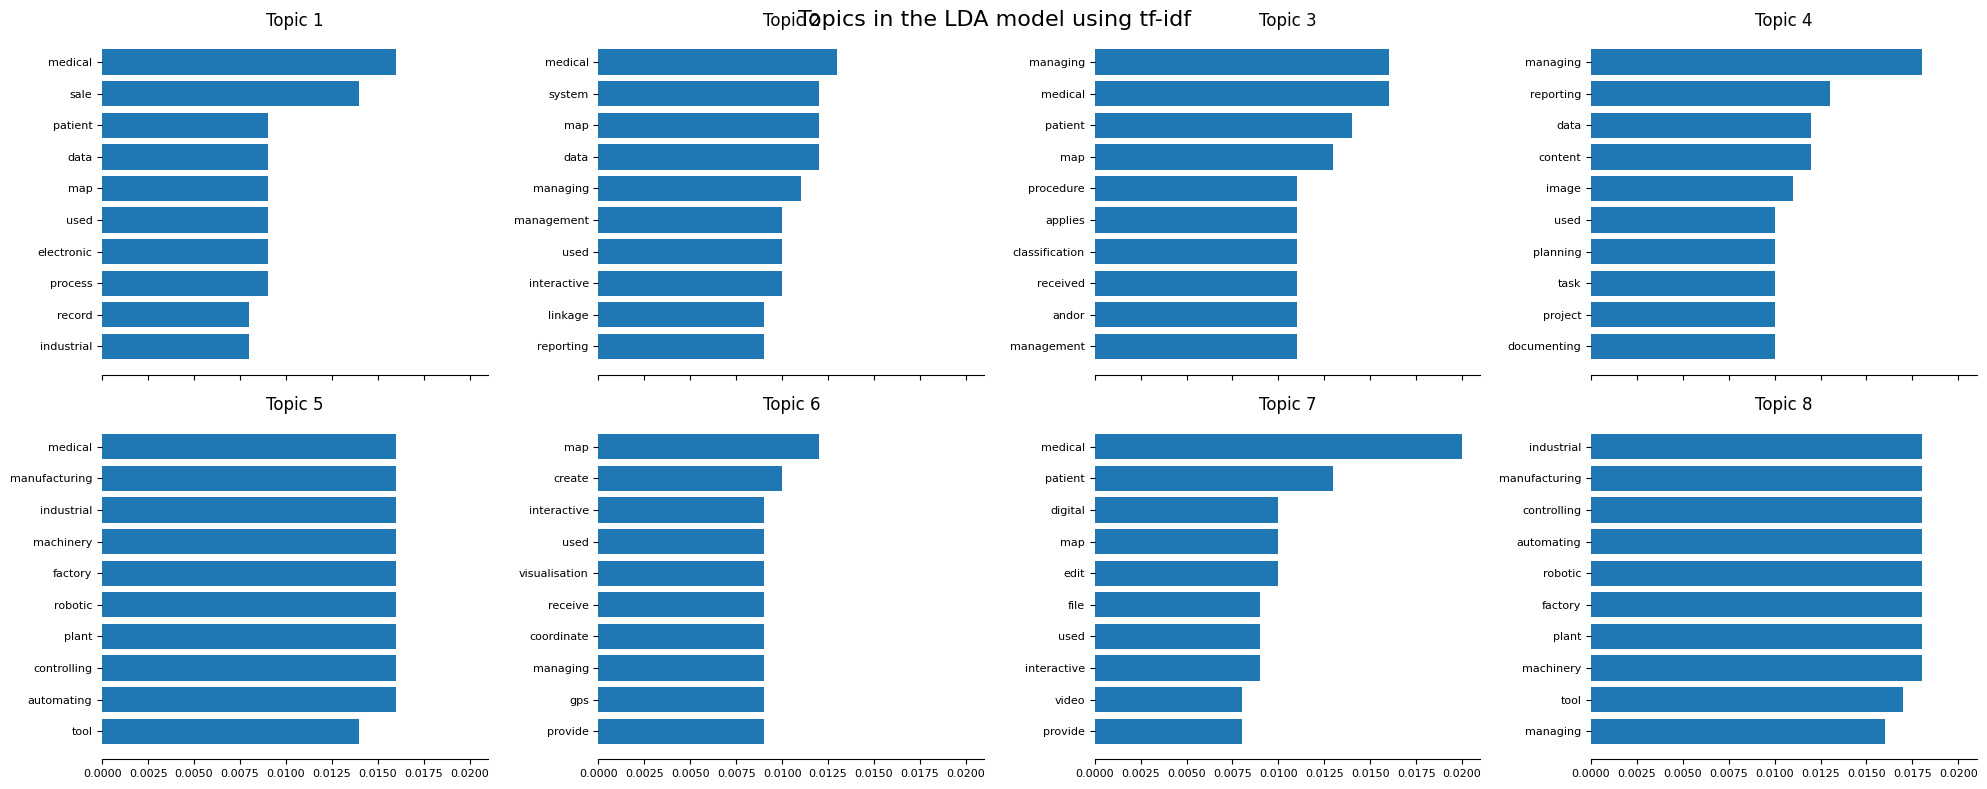

      Dominant_Topic  Perc_Contribution  \
0                  6             0.8017   
1                  2             0.6099   
2                  1             0.8508   
3                  6             0.8135   
4                  7             0.8445   
...              ...                ...   
1312               3             0.8626   
1313               3             0.8407   
1314               7             0.7959   
1315               3             0.8654   
1316               3             0.8802   

                                         Topic_Keywords  index  \
0     medical, patient, digital, map, edit, file, us...      0   
1     managing, medical, patient, map, procedure, ap...      1   
2     medical, system, map, data, managing, manageme...      2   
3     medical, patient, digital, map, edit, file, us...      3   
4     industrial, manufacturing, controlling, automa...      4   
...                                                 ...    ...   
1312  managing, repor

In [439]:
from gensim.models import LdaMulticore
from gensim.models import TfidfModel
import matplotlib.pyplot as plt
import math

# Create TF-IDF model using the same pre-processed corpus
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Train the LDA model
num_topics = 8
lda_model = LdaMulticore(corpus=corpus_tfidf, id2word=dictionary, num_topics=8, random_state=42)

# Print the topics
print("Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

# Visualize the topics in bar plots
def plot_top_words(model, feature_names, n_top_words, title):
    # Get the number of topics
    num_topics = len(model.print_topics(-1))

    # Calculate the number of rows and columns for subplots
    num_cols = min(4, num_topics)  # Maximum 4 columns
    num_rows = math.ceil(num_topics / num_cols)

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 4*num_rows), sharex=True)
    axes = axes.flatten() if num_topics > 1 else [axes]

    for topic_idx, topic in model.print_topics(-1):
        # Use regex to extract words and weights
        words_weights = re.findall(r'(0\.\d+)\*"(.+?)"', topic)

        if words_weights:
            weights, words = zip(*words_weights)
            weights = [float(w) for w in weights]
        else:
            print(f"No matches found for topic {topic_idx}")
            continue

        ax = axes[topic_idx]
        ax.barh(words[:n_top_words], weights[:n_top_words])
        ax.set_title(f'Topic {topic_idx + 1}')
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=8)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)

    # Hide any unused subplots
    for idx in range(num_topics, len(axes)):
        axes[idx].set_visible(False)

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjust to prevent title overlap
    plt.show()

plot_top_words(lda_model, dictionary.values(), n_top_words=10, title='Topics in the LDA model using tf-idf')

# Assign topics to documents
def format_topics_sentences(ldamodel, corpus):
    topics_df = []

    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topics_df.append([int(topic_num), round(prop_topic,4), topic_keywords])
            else:
                break

    return pd.DataFrame(topics_df, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

# Use the function
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus_tfidf)

# Combine original dataframe with the topic dataframe
df_dominant_tt = pd.concat([df_topic_sents_keywords, tt_nlp_aggregated.reset_index()], axis=1)
print(df_dominant_tt)

In [441]:
# Filter the data for 'Data Scientist' and get its dominant topic
data_scientist_topic = df_dominant_tt[df_dominant_tt['ANZSCO Title_x'] == 'Data Scientist']['Dominant_Topic'].values[0]



# Find all jobs with the same Dominant Topic as 'Data Scientist'
same_topic_jobs_tf = df_dominant_tt[df_dominant_tt['Dominant_Topic'] == data_scientist_topic]

# Display the relevant columns for these specific rows



In [444]:
same_topic_jobs_tf[['ANZSCO Title_x', 'Dominant_Topic']].head(214)

,ANZSCO Title_x,Dominant_Topic
2,Aboriginal Education Teacher,1
6,Accountant (General),1
7,Accountants,1
14,Actuary,1
20,Aeronautical Engineer,1
...,...,...
1275,Veterinary Practice Manager,1
1283,Vocational Education Teacher / Polytechnic Tea...,1
1284,Vocational Education Teachers / Polytechnic Te...,1
1303,Wholesaler,1


In [446]:
# Export same_topic_jobs to an Excel file
same_topic_jobs_tf[['ANZSCO Title_x', 'Dominant_Topic']].to_excel('same_topic_jobs.xlsx', index=False)


##### Cluster

In [489]:
lemmatized_clean_desc.head()

,Technology Tool Description
0,"[radio, communication, apparatus, enables, com..."
1,"[software, system, used, manage, employee, hum..."
2,"[software, used, manage, delivery, administrat..."
3,"[medical, apparatus, support, clinical, examin..."
4,"[software, used, produce, edit, manipulate, di..."


In [499]:
tt_nlp_cluster = tt_nlp_aggregated.copy()

In [500]:
tt_nlp_cluster.head()

,ANZSCO Title_x,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,Technology Tool Category,Technology Tool Category Description,Technology Tool,Technology Tool Description,Technology Tool Extended Description,Emerging/Trending Flag,ANZSCO Description,Technology Tool Example Count
0,Abalone Diver,Specialisation,399911,S01,Geographical guidance and navigation technolog...,"Systems for real-time navigation, mapping and ...",Aviation and marine communication systems Avia...,radio and communications apparatus that enable...,aviation and marine communication systems enco...,None,Swims underwater to undertake tasks such as se...,60.0
1,Abattoir Manager,NEC Category Occupation,149999,N01,Payroll and human resource management platform...,Systems to undertake human resource management...,Human resources software Human resources softw...,software and systems used to manage employee a...,human resources software encompasses software ...,None,"Plan, direct, or coordinate marina activities ...",192.0
2,Aboriginal Education Teacher,NEC Category Occupation,241599,N01,Education and student management platforms Edu...,Systems for managing student records and educa...,Student and learning management systems Studen...,software used to manage the delivery and admin...,student and learning management systems encomp...,None,This occupation group covers Special Education...,100.0
3,Aboriginal Health Nurse,NEC Category Occupation,254499,N08,"Physical examination, therapy and treatment te...",Medical instruments and technologies for treat...,"Medical examination, measurement, and monitori...",medical apparatus that supports the clinical e...,medical examination measurement and monitoring...,None,"Assess patient health problems and needs, deve...",117.0
4,Aboriginal and Torres Strait Islander Educatio...,ANZSCO 6,422111,None,Graphic design and imagery technologies Commun...,Software for graphic design and photographic e...,Graphics or photo imaging software Audio/video...,software used to produce edit and manipulate d...,graphics or photo imaging software encompasses...,None,Support Aboriginal and Torres Strait Islander ...,30.0


In [502]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Ensure that NLTK data is downloaded
nltk.download('stopwords')
nltk.download('punkt')

# List of stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to clean the text (remove special characters, digits, etc.)
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower().strip()  # Convert to lowercase and remove leading/trailing whitespaces
    return text

# Function to remove stopwords from tokenized words
def remove_stopwords(text):
    tokens = word_tokenize(text)  # Tokenize the text
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)  # Join the filtered tokens back into a string

# Apply the cleaning and stopword removal functions to the desired column
tt_nlp_cluster['cleaned_tokenized_text'] = tt_nlp_cluster['Technology Tool Description'].apply(clean_text)
tt_nlp_cluster['cleaned_no_stopwords'] = tt_nlp_cluster['cleaned_tokenized_text'].apply(remove_stopwords)

# Check the cleaned and stopword-removed column
print(tt_nlp_cluster[['Technology Tool Description', 'cleaned_no_stopwords']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                         Technology Tool Description  \
0  radio and communications apparatus that enable...   
1  software and systems used to manage employee a...   
2  software used to manage the delivery and admin...   
3  medical apparatus that supports the clinical e...   
4  software used to produce edit and manipulate d...   

                                cleaned_no_stopwords  
0  radio communications apparatus enables communi...  
1  software systems used manage employee human re...  
2  software used manage delivery administration e...  
3  medical apparatus supports clinical examinatio...  
4  software used produce edit manipulate digital ...  


In [503]:
# Import the necessary libraries

import sklearn # Popular machine learning library
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf vectorizer module

In [510]:
vectorizer = TfidfVectorizer() # Load the tf-idf vectorizer from sklearn
X = vectorizer.fit_transform(tt_nlp_cluster['cleaned_no_stopwords'])
# Fit the vectorizer on the entire data
print(X.shape)

(1317, 489)


In [511]:
# Extract the vocabulary from the vectorizer
vocab = vectorizer.vocabulary_
print(f"Number of terms in the vocabulary = {len(vocab)}")

Number of terms in the vocabulary = 489


In [512]:
# Display a sample of the word => value mapping
print("Sample Mapping")
for idx, ele in enumerate(zip(vocab.keys(), vocab.values())):
    word, val = ele
    print(f"{word} => {val}")
    if idx == 4: break

Sample Mapping
radio => 350
communications => 75
apparatus => 15
enables => 147
communication => 74


In [513]:
#Import required packages
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [529]:
# Function to plot the Elbow Method
def plot_elbow_method(X):
    sse = []
    k_range = range(2, 25)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    plt.figure()
    plt.plot(k_range, sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method')
    plt.show()

In [533]:
# Function to plot the Silhouette Method
def plot_silhouette_method(X):
    silhouette_avg_scores = []
    k_range = range(2, 25)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(X, labels)
        silhouette_avg_scores.append(silhouette_avg)
    plt.figure()
    plt.plot(k_range, silhouette_avg_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method')
    plt.show()

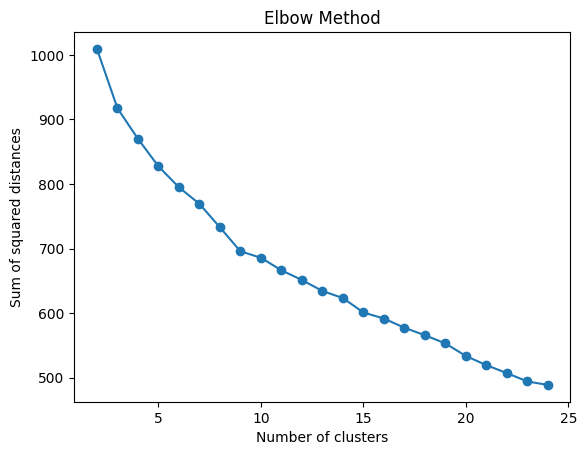

In [531]:
# Plot Elbow Method
plot_elbow_method(X)

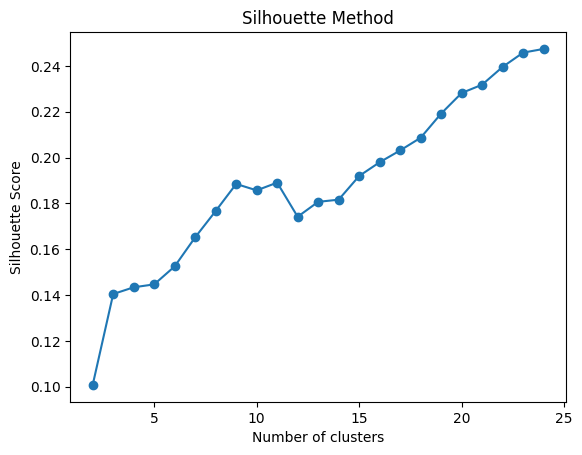

In [534]:
plot_silhouette_method(X)

In [535]:
# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=9, random_state=42)

In [536]:
# Get the cluster labels
labels = kmeans.labels_
print(labels)

[1 8 3 ... 0 6 4]


In [537]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.18849019378787413


In [538]:
# Create a DataFrame to display the results
clustered_docs = pd.DataFrame({'Document': tt_nlp_cluster['cleaned_no_stopwords'], 'Cluster': labels})

In [539]:
# Display a few documents from each cluster
for i in range(5):
    print(f"\nCluster {i} documents:")
    print(clustered_docs[clustered_docs['Cluster'] == i].head(3))  # Display first 3 documents in each cluster


Cluster 0 documents:
                                             Document  Cluster
28  scientific laboratory apparatus used undertake...        0
30  software automating monitoring controlling rob...        0
32  devices software receive provide gps coordinat...        0

Cluster 1 documents:
                                             Document  Cluster
0   radio communications apparatus enables communi...        1
29  software used overlay interlink datasets inter...        1
40  devices software receive provide gps coordinat...        1

Cluster 2 documents:
                                             Document  Cluster
3   medical apparatus supports clinical examinatio...        2
15  apparatus used perform alternative complementa...        2
22  software applies codes classifications medical...        2

Cluster 3 documents:
                                             Document  Cluster
2   software used manage delivery administration e...        3
11  apparatus transmits receiv

In [540]:
!pip install umap-learn
from umap import UMAP

# Reduce dimensionality using UMAP
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


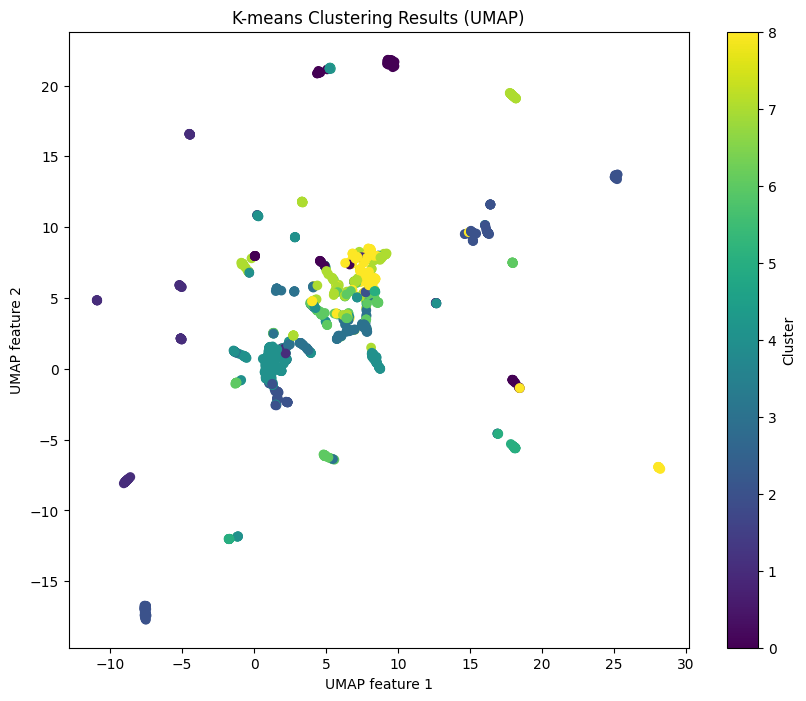

In [541]:
# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering Results (UMAP)')
plt.xlabel('UMAP feature 1')
plt.ylabel('UMAP feature 2')
plt.colorbar(scatter, label='Cluster')
plt.show()